### Problem 

### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.
#### Rose dataset :
### 1. Read the data as an appropriate Time Series data and plot the data.
### Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('seaborn')
from pylab import rcParams
from sklearn import metrics
from warnings import filterwarnings
filterwarnings('ignore')

### Loading data in Data Frame

In [2]:
df_1= pd.read_csv('Rose.csv',parse_dates=True,squeeze=True,index_col=0)

### Checking head of the data

In [3]:
df_1.head()

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64

### Checking tail of the data

In [4]:
df_1.tail()

YearMonth
1995-03-01    45.0
1995-04-01    52.0
1995-05-01    28.0
1995-06-01    40.0
1995-07-01    62.0
Name: Rose, dtype: float64

### Loading the data in another data frame

In [5]:
df_2= pd.read_csv('Rose.csv')

### Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [6]:
date= pd.date_range(start='1/1/1980',end='8/1/1995',freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [7]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df_2.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [8]:
df_2['Time_Stamp'] = pd.to_datetime(df_2['Time_Stamp'])

In [9]:
df = df_2.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [10]:
df.tail()

,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


Now, we have our data ready for the Time Series Analysis.

### Plot the Time Series to understand the behaviour of the data

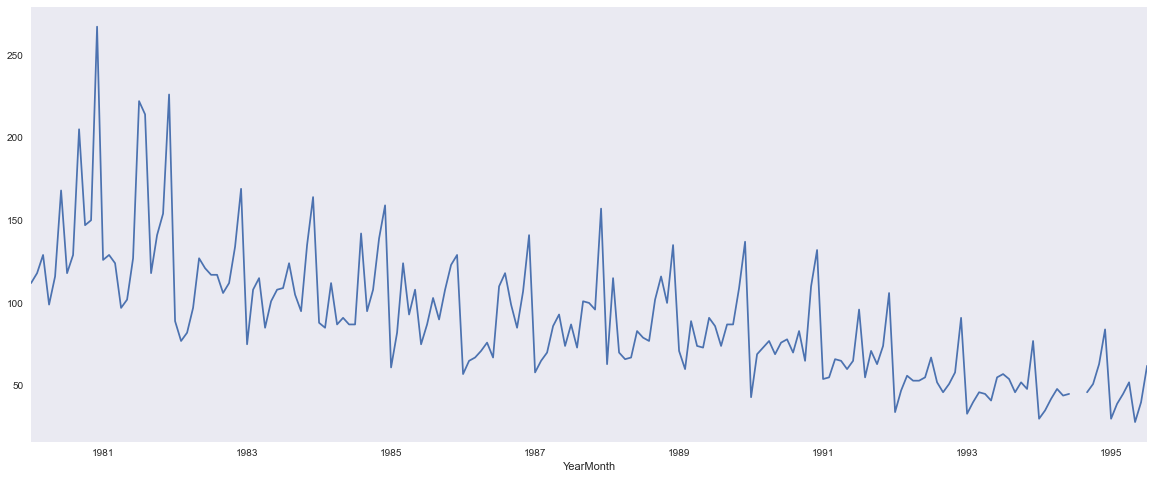

In [11]:
df_1.plot(figsize=(20,8))
plt.grid();

Text(0, 0.5, 'Units Sold')

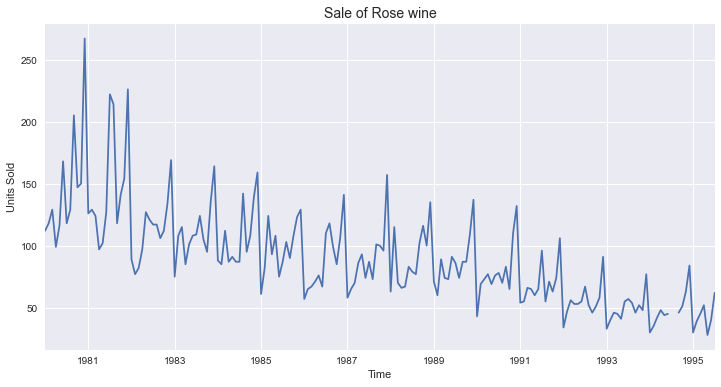

In [12]:
plt.figure(figsize = (12, 6))
df.Rose.plot()
plt.title('Sale of Rose wine', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

We can see Negative trend and seasonality in the above Time series data.

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.
### Checking for missing values

In [13]:
df.isnull().sum()

Rose    2
dtype: int64

There are two missing values in the dataset.

### Handling missing values

In [14]:
df['1994']

,Rose
Time_Stamp,
1994-01-31,30.0
1994-02-28,35.0
1994-03-31,42.0
1994-04-30,48.0
1994-05-31,44.0
1994-06-30,45.0
1994-07-31,NaN
1994-08-31,NaN
1994-09-30,46.0


Since the data has monthly frequency, we can resample at a shorter frequency such as day, Daily to get a better predicton.

In [15]:
df.converted  = df.Rose
ts = df.converted.resample('D').mean() 
df.Rose = ts.interpolate(method = 'linear')
df.Rose['1994']

Time_Stamp
1994-01-31    30.000000
1994-02-28    35.000000
1994-03-31    42.000000
1994-04-30    48.000000
1994-05-31    44.000000
1994-06-30    45.000000
1994-07-31    45.336957
1994-08-31    45.673913
1994-09-30    46.000000
1994-10-31    51.000000
1994-11-30    63.000000
1994-12-31    84.000000
Name: Rose, dtype: float64

In [16]:
df.isnull().sum()

Rose    0
dtype: int64

Missing values been treated successfuly.
### Check the basic measures of descriptive statisticsCheck the basic measures of descriptive statistics

In [17]:
df.describe()

,Rose
count,187.000000
mean,89.914497
std,39.238259
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


### Plot a boxplot to understand the spread of sales across different years and within different months across years.
### Yearly Boxplot

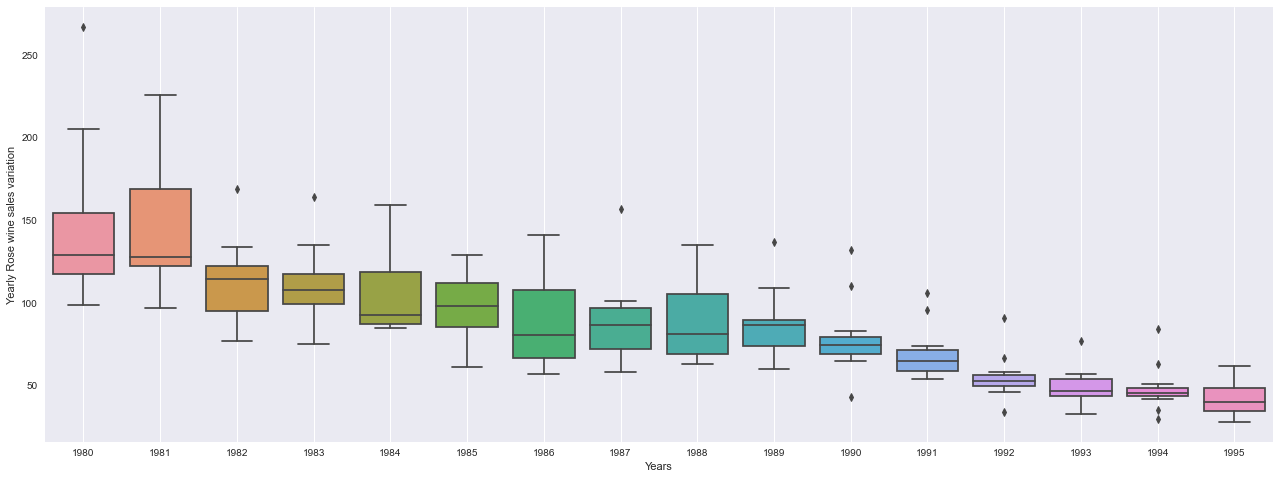

In [18]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Rose wine sales variation');

### Monthly plot

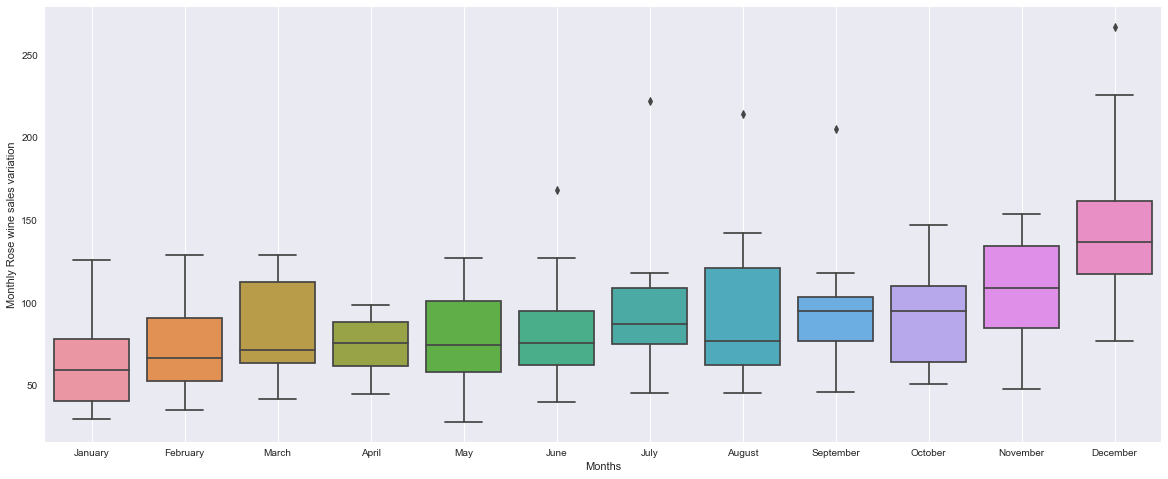

In [19]:
fig,ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=df.index.month_name(),y=df.values[:,0],ax=ax)
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Rose wine sales variation');

### Plot a time series monthplot to understand the spread of sales across different years and within different months across years.

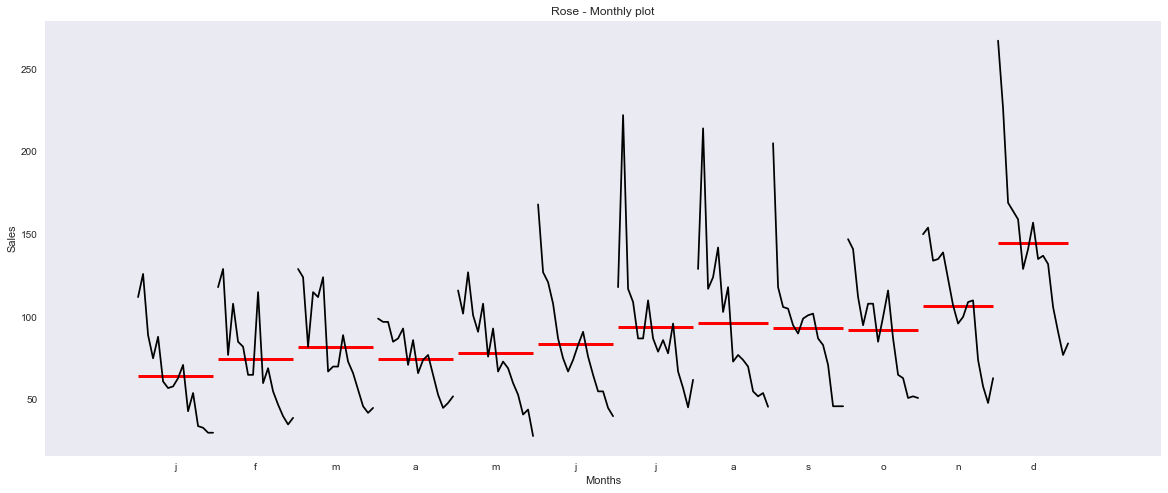

In [20]:
from statsmodels.graphics.tsaplots import month_plot
fig,ax = plt.subplots(figsize=(20,8))
month_plot(df['Rose'],ylabel='Sales',ax=ax)
plt.grid();
plt.xlabel('Months')
plt.title('Rose - Monthly plot');

This plot shows us the behaviour of the Time Series across various months. The red line is the median value.

### Plot the Empirical Cumulative Distribution.

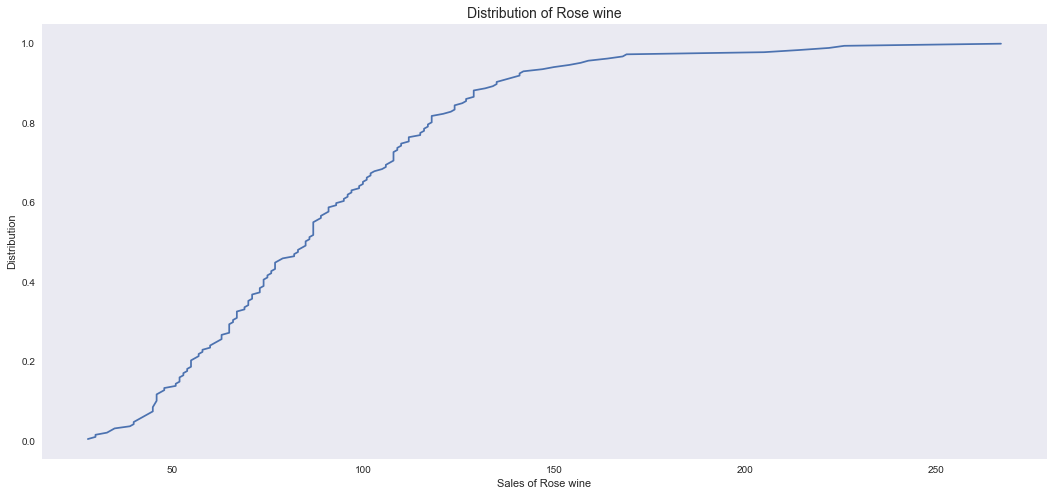

In [21]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid();
plt.title('Distribution of Rose wine', fontsize=14);
plt.xlabel('Sales of Rose wine');
plt.ylabel('Distribution');

The above graph is an Empirical Curve Distribution graph which shows us what percentage of data points are tied to what number of Sales,


The Empirical CDF plot shows that, in 80% of months, at least 120 units of Rose wine were sold
### Plot a graph of monthly sales across years

In [22]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


Text(0.5, 1.0, 'Rose - Monthly sales over years')

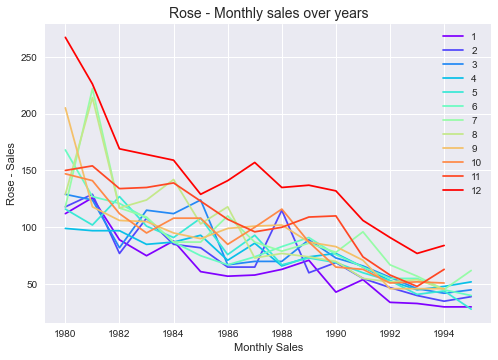

In [23]:
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Rose - Sales')
plt.xlabel('Monthly Sales')
plt.title('Rose - Monthly sales over years', fontsize=14)

-  The monthly plot for Rose shows mean and variation of units sold each month over the years. Sale in months such as July, August, September and December shows a higher variation than the rest


- Sale in December with a mean few points below 100, varies from 75 to 270 units over the years. Whereas the average sale is less than or closer to 100 units (above 50) for the rest of the year


### Plot the average sales per month and the month on month percentage change of sales.

Text(0.5, 0, 'Time')

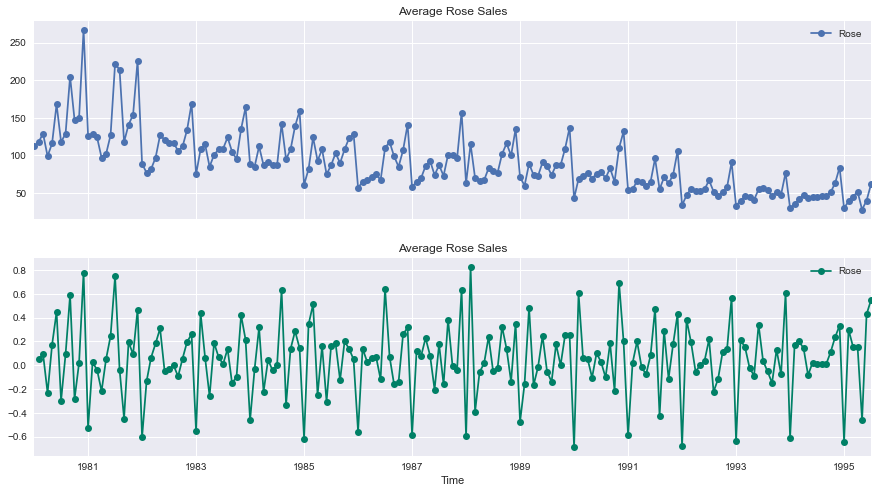

In [24]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Average Rose Sales",grid=True)
plt.xlabel('Time')


The above two graphs tell us the Average 'Rose' and the Percentage change of 'Rose' with respect to the time.
### Decompose the Time Series and plot the different components.

In [25]:
from statsmodels.tsa.seasonal import  seasonal_decompose

### Additive Decomposition

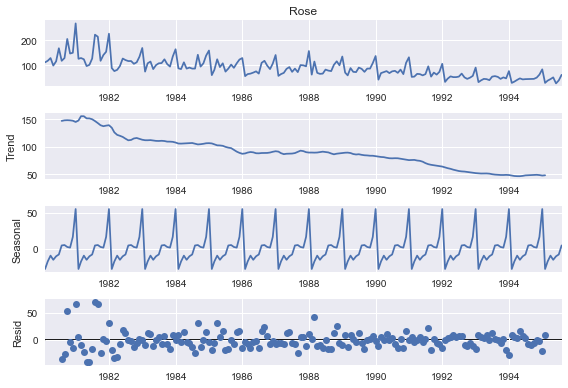

In [26]:
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

In [27]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908708
1980-02-29   -17.435675
1980-03-31    -9.285895
1980-04-30   -15.098395
1980-05-31   -10.196609
1980-06-30    -7.678752
1980-07-31     4.897089
1980-08-31     5.500109
1980-09-30     2.774625
1980-10-31     1.871848
1980-11-30    16.846848
1980-12-31    55.713514
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980423
1980-08-31   -24.625109
1980-09-30    53.850375
1980-10-31    -2.955181
1980-11-30   -14.263514
1980-12-31    66.16

### Multiplicative Decomposition

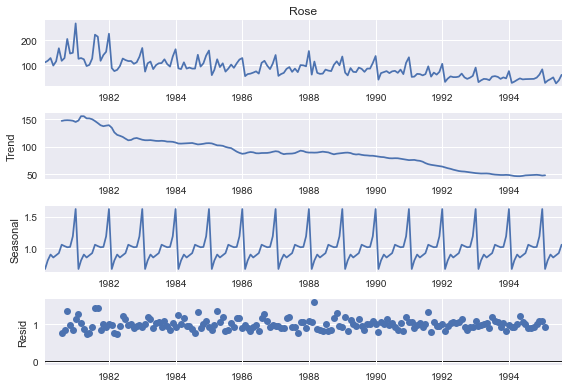

In [28]:
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

In [29]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901163
1980-04-30    0.854023
1980-05-31    0.889414
1980-06-30    0.923984
1980-07-31    1.058042
1980-08-31    1.035890
1980-09-30    1.017647
1980-10-31    1.022572
1980-11-30    1.192347
1980-12-31    1.628644
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758256
1980-08-31    0.840713
1980-09-30    1.357675
1980-10-31    0.970772
1980-11-30    0.853379
1980-12-31    1.129647
Name: resid, dtype:

### 3. Split the data into training and test. The test data should start in 1991.
### Spliting the data into training and testing

In [30]:
train = df[df.index.year < 1991]
test = df[df.index.year >= 1991]

In [31]:
from IPython.display import display

In [32]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [33]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


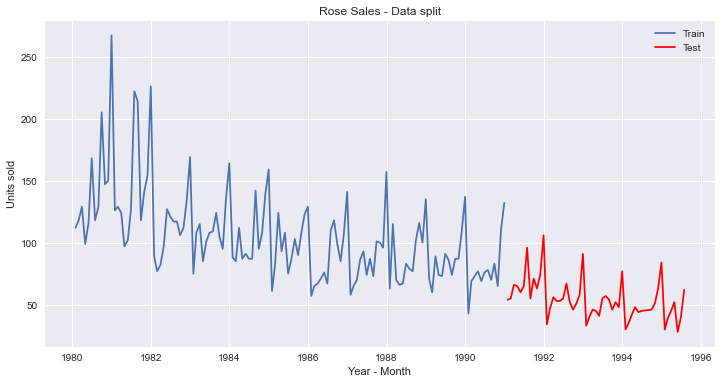

In [34]:
plt.figure(figsize = (12, 6))
plt.plot(train['Rose'], label = 'Train')
plt.plot(test['Rose'], label = 'Test', color='Red')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose Sales - Data split', fontsize = 12)
plt.show;

### 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.
### Model 1: Linear Regression

In [35]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [36]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [37]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr2 = LinearRegression()
lr2.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

In [40]:
LinearRegression_train['time']

Time_Stamp
1980-01-31      1
1980-02-29      2
1980-03-31      3
1980-04-30      4
1980-05-31      5
             ... 
1990-08-31    128
1990-09-30    129
1990-10-31    130
1990-11-30    131
1990-12-31    132
Name: time, Length: 132, dtype: int64

In [41]:
LinearRegression_train['RegOnTime_rose']        = lr2.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_rose']         = lr2.predict(LinearRegression_test[['time']])

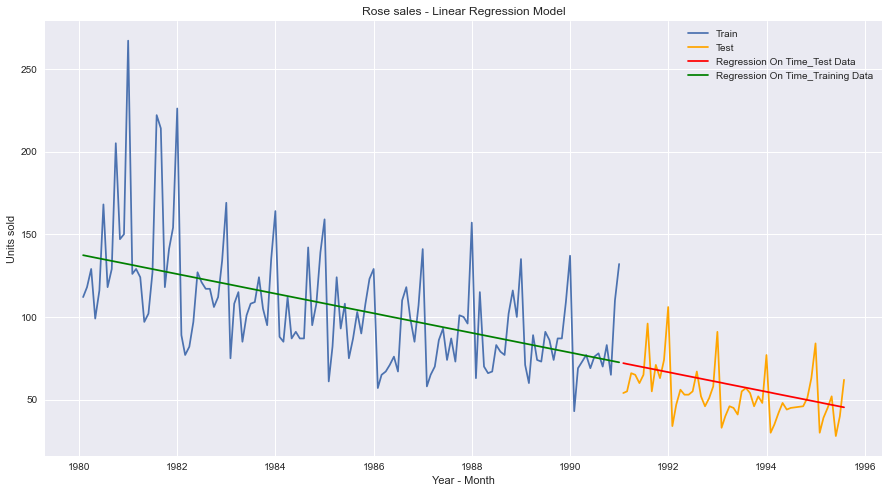

In [42]:
plt.figure(figsize=(15,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression On Time_Test Data', color = 'red')
plt.plot(LinearRegression_train['RegOnTime_rose'], label='Regression On Time_Training Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose sales - Linear Regression Model');

### Model Evaluation

In [43]:
from sklearn import metrics
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [44]:
# Training Data - RMSE and MAPE

rmse_rose_model1_train = metrics.mean_squared_error(train['Rose'],LinearRegression_train['RegOnTime_rose'],squared=False)
mape_rose_model1_train = MAPE(train['Rose'],LinearRegression_train['RegOnTime_rose'])
print("For RegressionOnTime forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model1_train, mape_rose_model1_train))

For RegressionOnTime forecast on the Rose Training Data:  RMSE is 30.718 and MAPE is 21.22


In [45]:
# testing Data - RMSE and MAPE

rmse_rose_model1_test = metrics.mean_squared_error(test['Rose'],LinearRegression_test['RegOnTime_rose'],squared=False)
mape_rose_model1_test = MAPE(test['Rose'],LinearRegression_test['RegOnTime_rose'])
print("For RegressionOnTime forecast on the Rose testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model1_test, mape_rose_model1_test))

For RegressionOnTime forecast on the Rose testing Data:  RMSE is 15.269 and MAPE is 22.82


In [46]:
rose_resultsDf = pd.DataFrame({'Test RMSE': [rmse_rose_model1_test],'Test MAPE': [mape_rose_model1_test]},index=['RegressionOnTime'])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268885,22.82


### Model 2: Naive forecast

In [47]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [48]:
NaiveModel_train['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['rose_naive'].head()

Time_Stamp
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: rose_naive, dtype: float64

In [49]:
NaiveModel_test['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['rose_naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: rose_naive, dtype: float64

Text(0.5, 1.0, 'Rose - Naive Forecast')

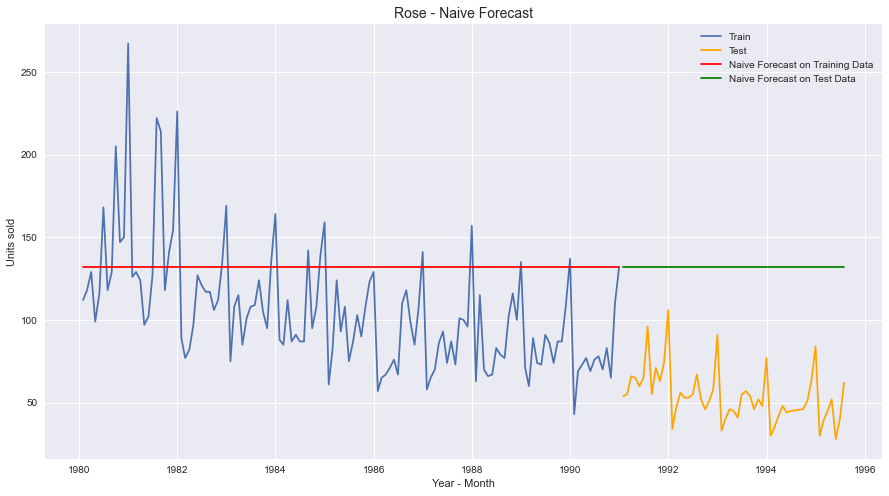

In [50]:
plt.figure(figsize=(15,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['rose_naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['rose_naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - Naive Forecast", fontsize = 14)

### Model Evauation

In [51]:
# Training Data - RMSE and MAPE

rmse_rose_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['rose_naive'],squared=False)
mape_rose_model2_train = MAPE(train['Rose'],NaiveModel_train['rose_naive'])
print("For Naive forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model2_train, mape_rose_model2_train))

For Naive forecast on the Rose Training Data:  RMSE is 45.064 and MAPE is 36.38


In [52]:
# Testing Data - RMSE and MAPE

rmse_rose_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['rose_naive'],squared=False)
mape_rose_model2_test = MAPE(test['Rose'],NaiveModel_test['rose_naive'])
print("For Naive forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model2_test, mape_rose_model2_test))

For Naive forecast on the Rose Testing Data:  RMSE is 79.719 and MAPE is 145.10


In [53]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model2_test],'Test MAPE': [mape_rose_model2_test]},index=['NaiveModel'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10


### Model 3: Simple Average

In [54]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [55]:
SimpleAverage_train['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_train['rose_mean_forecast'].head()

Time_Stamp
1980-01-31    104.939394
1980-02-29    104.939394
1980-03-31    104.939394
1980-04-30    104.939394
1980-05-31    104.939394
Name: rose_mean_forecast, dtype: float64

In [56]:
SimpleAverage_test['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_test['rose_mean_forecast'].head()

Time_Stamp
1991-01-31    104.939394
1991-02-28    104.939394
1991-03-31    104.939394
1991-04-30    104.939394
1991-05-31    104.939394
Name: rose_mean_forecast, dtype: float64

Text(0.5, 1.0, 'Rose - SimpleAverage Forecast')

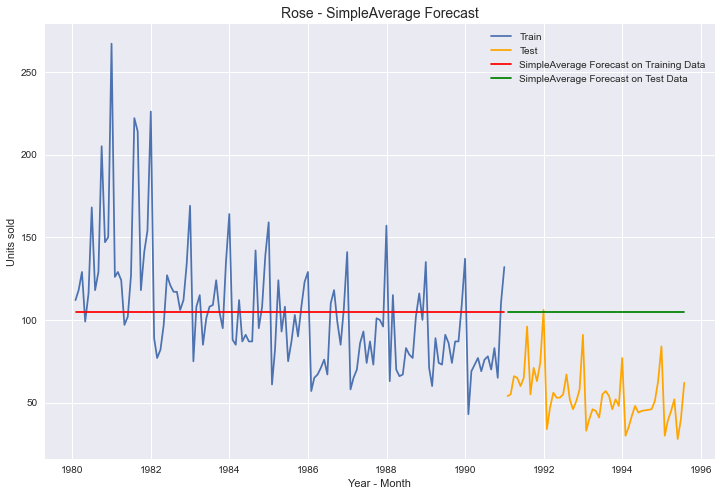

In [57]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['rose_mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Rose - SimpleAverage Forecast", fontsize=14)

### Model Evaluation

In [58]:
# Training Data - RMSE and MAPE

rmse_rose_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['rose_mean_forecast'],squared=False)
mape_rose_model3_train = MAPE(train['Rose'],SimpleAverage_train['rose_mean_forecast'])
print("For Simple Average forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model3_train, mape_rose_model3_train))

For Simple Average forecast on the Rose Training Data:  RMSE is 36.034 and MAPE is 25.39


In [59]:
# Testing Data - RMSE and MAPE

rmse_rose_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['rose_mean_forecast'],squared=False)
mape_rose_model3_test = MAPE(test['Rose'],SimpleAverage_test['rose_mean_forecast'])
print("For Simple Average forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model3_test, mape_rose_model3_test))

For Simple Average forecast on the Rose Testing Data:  RMSE is 53.460 and MAPE is 94.93


In [60]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model3_test],'Test MAPE': [mape_rose_model3_test]},index=['SimpleAverage'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10
SimpleAverage,53.460350,94.93


### Model 4: Moving Average

In [61]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [62]:
MovingAverage['Rose_Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Rose_Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Rose_Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Rose_Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Rose_Trailing_2,Rose_Trailing_4,Rose_Trailing_6,Rose_Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


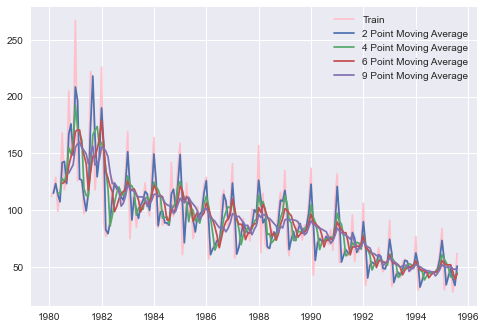

In [63]:
plt.plot(MovingAverage['Rose'], label='Train', color='pink')
plt.plot(MovingAverage['Rose_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

In [64]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

Text(0.5, 1.0, 'Rose - Trailing Moving Average Forecast')

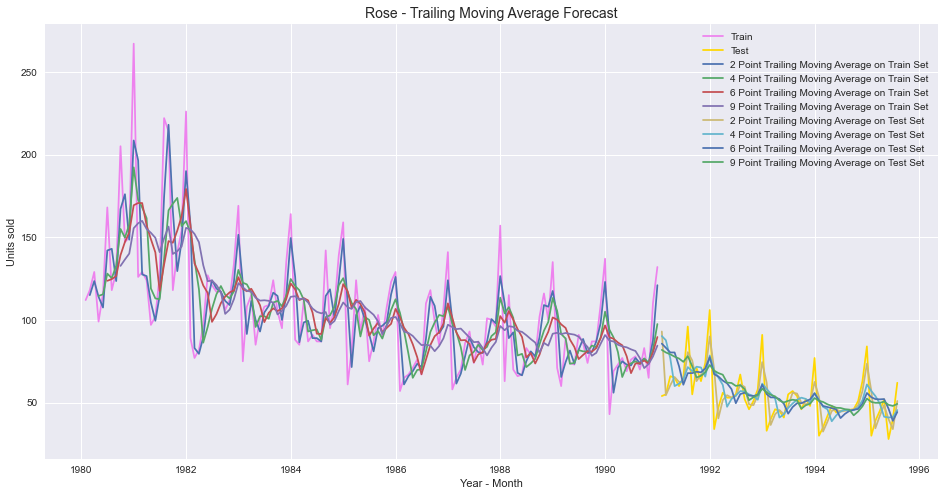

In [65]:
# Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train', color = 'violet')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Rose - Trailing Moving Average Forecast", fontsize=14)

### Model Evaluation

In [66]:
## Test Data - rmse_rose and mape_rose --> 2 point rose_Trailing MA

rmse_rose_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'],squared=False)
mape_rose_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_2, mape_rose_model4_test_2))

## Test Data - rmse_rose and mape_rose --> 4 point rose_Trailing MA

rmse_rose_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'],squared=False)
mape_rose_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_4, mape_rose_model4_test_4))

## Test Data - rmse_rose and mape_rose --> 6 point rose_Trailing MA

rmse_rose_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'],squared=False)
mape_rose_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_6, mape_rose_model4_test_6))

## Test Data - rmse_rose and mape_rose --> 9 point rose_Trailing MA

rmse_rose_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'],squared=False)
mape_rose_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_9, mape_rose_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is 11.529 mape_rose is 13.54
For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.451 mape_rose is 19.49
For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.566 mape_rose is 20.82
For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.728 mape_rose is 21.01


In [67]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_rose_model4_test_2,rmse_rose_model4_test_4
                                          ,rmse_rose_model4_test_6,rmse_rose_model4_test_9]
                            ,'Test MAPE': [mape_rose_model4_test_2,mape_rose_model4_test_4,
                                           mape_rose_model4_test_6,mape_rose_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_4])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10
SimpleAverage,53.460350,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451364,19.49
6 point TMA,14.566269,20.82
9 point TMA,14.727594,21.01


### Model 5: Simple Exponential Smoothing

In [68]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [69]:
SES_train = train.copy()
SES_test = test.copy()

In [70]:
model_rose = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [71]:
model_SES_autofit2 = model_rose.fit(optimized=True,use_brute=True)
model_SES_autofit2.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [72]:
SES_train['predict_rose'] = model_SES_autofit2.fittedvalues
SES_train.head()

,Rose,predict_rose
Time_Stamp,,
1980-01-31,112.0,134.387202
1980-02-29,118.0,132.176481
1980-03-31,129.0,130.776564
1980-04-30,99.0,130.601129
1980-05-31,116.0,127.480539


In [73]:
SES_test['predict_rose'] = model_SES_autofit2.forecast(steps=len(SES_test))
SES_test.head()

,Rose,predict_rose
Time_Stamp,,
1991-01-31,54.0,87.104983
1991-02-28,55.0,87.104983
1991-03-31,66.0,87.104983
1991-04-30,65.0,87.104983
1991-05-31,60.0,87.104983


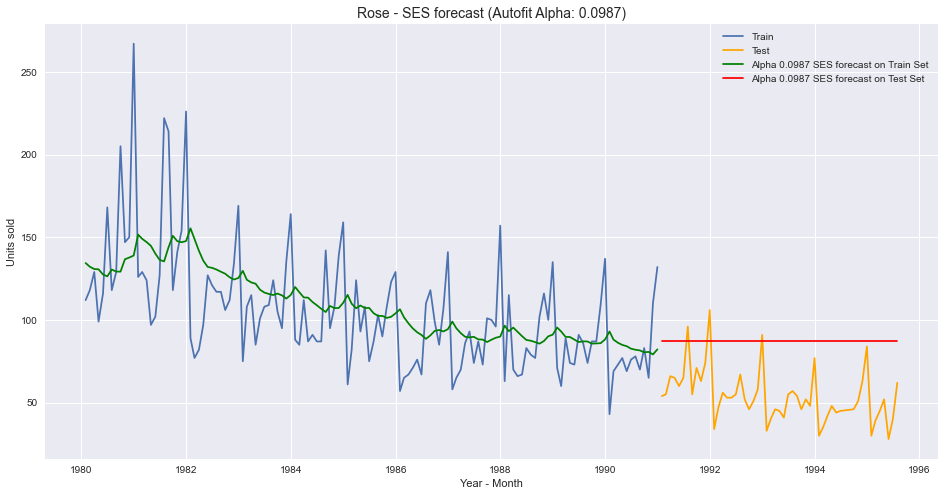

In [74]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test', color = 'orange')

plt.plot(SES_train['predict_rose'],color = 'green', label='Alpha 0.0987 SES forecast on Train Set')
plt.plot(SES_test['predict_rose'],color = 'red', label='Alpha 0.0987 SES forecast on Test Set')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose - SES forecast (Autofit Alpha: 0.0987)', fontsize = 14);

### Model Evaluation

In [75]:
# Training Data - RMSE and MAPE

rmse_rose_model5_train = metrics.mean_squared_error(train['Rose'],SES_train['predict_rose'],squared=False)
mape_rose_model5_train = MAPE(train['Rose'],SES_train['predict_rose'])
print("For SES forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_train, mape_rose_model5_train))

For SES forecast on the Rose Training Data:  RMSE is 31.501 and MAPE is 22.73


In [76]:
# Testing Data - RMSE and MAPE

rmse_rose_model5_test = metrics.mean_squared_error(test['Rose'],SES_test['predict_rose'],squared=False)
mape_rose_model5_test = MAPE(test['Rose'],SES_test['predict_rose'])
print("For SES forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_test, mape_rose_model5_test))

For SES forecast on the Rose Testing Data:  RMSE is 36.796 and MAPE is 63.88


In [77]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_rose_model5_test],'Test MAPE': [mape_rose_model5_test]},index=['SES Alpha 0.01'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_5])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10
SimpleAverage,53.460350,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451364,19.49
6 point TMA,14.566269,20.82
9 point TMA,14.727594,21.01
SES Alpha 0.01,36.796004,63.88


### Model 6: Double Exponential Smoothing (Holt's Model)

In [78]:
DES_train = train.copy()
DES_test = test.copy()

In [79]:
model_DES_rose = Holt(DES_train['Rose'])

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [80]:
resultsDf_6_rose = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_rose_alpha_i_j = model_DES_rose.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict_rose',i,j] = model_DES_rose_alpha_i_j.fittedvalues
        DES_test['predict_rose',i,j] = model_DES_rose_alpha_i_j.forecast(len(test['Rose']))
        
        rmse_rose_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict_rose',i,j],squared=False)
        mape_rose_model6_train = MAPE(DES_train['Rose'],DES_train['predict_rose',i,j])
        
        rmse_rose_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict_rose',i,j],squared=False)
        mape_rose_model6_test = MAPE(DES_test['Rose'],DES_test['predict_rose',i,j])
        
        resultsDf_6_rose = resultsDf_6_rose.append({'Alpha':i,'Beta':j,'Train RMSE':rmse_rose_model6_train
                                      ,'Train MAPE': mape_rose_model6_train,'Test RMSE':rmse_rose_model6_test
                                      ,'Test MAPE':mape_rose_model6_test}, ignore_index=True)

In [81]:
resultsDf_6_rose.sort_values(by=['Test RMSE']).head()

,Alpha,Beta,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,32.026565,22.78,37.056911,64.02
1,0.1,0.2,32.685228,23.63,48.806921,83.29
10,0.2,0.1,32.796403,23.06,65.731352,113.20
2,0.1,0.3,32.925494,24.23,78.209401,131.33
20,0.3,0.1,33.528397,23.47,98.653063,170.12


In [82]:
resultsDf_6_rose.sort_values(by=['Test MAPE']).head()

,Alpha,Beta,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,32.026565,22.78,37.056911,64.02
1,0.1,0.2,32.685228,23.63,48.806921,83.29
10,0.2,0.1,32.796403,23.06,65.731352,113.20
2,0.1,0.3,32.925494,24.23,78.209401,131.33
3,0.1,0.4,33.179749,24.75,99.554566,165.49


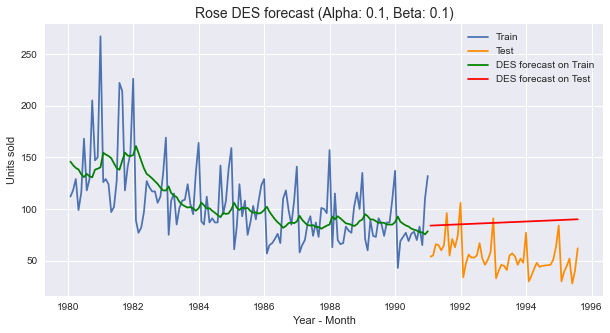

In [83]:
plt.figure(figsize=(10,5))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_rose', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_rose', 0.1, 0.1], color = 'red', label='DES forecast on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose DES forecast (Alpha: 0.1, Beta: 0.1)', fontsize=14);
plt.legend(loc='best');

#### Trying auto fit by the model

In [84]:
model_DES_rose_autofit = model_DES_rose.fit(optimized=True,use_brute=True)

In [85]:
model_DES_rose_autofit.params

{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [86]:
alpha = model_DES_rose_autofit.params['smoothing_level']
beta = model_DES_rose_autofit.params['smoothing_trend']
alpha_6_2 = alpha
beta_6_2 = beta

In [87]:
DES_train['predict_rose',alpha,beta] = model_DES_rose_autofit.fittedvalues
DES_test['predict_rose',alpha,beta] = model_DES_rose_autofit.forecast(len(test['Rose']))

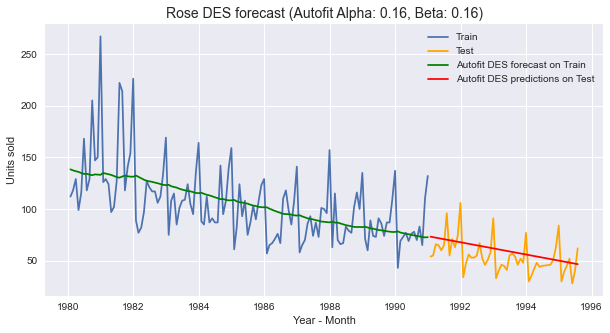

In [88]:
plt.figure(figsize=(10,5))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test', color = 'orange')

plt.plot(DES_train['predict_rose',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_rose',alpha,beta], color = 'red', label='Autofit DES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose DES forecast (Autofit Alpha: 0.16, Beta: 0.16)', fontsize=14)

plt.legend(loc='best')

In [89]:
rmse_rose_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict_rose',alpha,beta],squared=False)
mape_rose_model6_train = MAPE(DES_train['Rose'],DES_train['predict_rose',alpha,beta])
        
rmse_rose_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict_rose',alpha,beta],squared=False)
mape_rose_model6_test = MAPE(DES_test['Rose'],DES_test['predict_rose',alpha,beta])
        
resultsDf_6_rose = resultsDf_6_rose.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_rose_model6_train
                                      ,'Train MAPE': mape_rose_model6_train,'Test RMSE':rmse_rose_model6_test
                                      ,'Test MAPE':mape_rose_model6_test}, ignore_index=True)

In [90]:
resultsDf_6_rose.sort_values(by=['Test RMSE']).head()

,Alpha,Beta,Train RMSE,Train MAPE,Test RMSE,Test MAPE
100,0.01755,0.000032,30.890794,21.61,15.706968,24.12
0,0.10000,0.100000,32.026565,22.78,37.056911,64.02
1,0.10000,0.200000,32.685228,23.63,48.806921,83.29
10,0.20000,0.100000,32.796403,23.06,65.731352,113.20
2,0.10000,0.300000,32.925494,24.23,78.209401,131.33


In [91]:
resultsDf_6_rose.sort_values(by=['Test MAPE']).head()

,Alpha,Beta,Train RMSE,Train MAPE,Test RMSE,Test MAPE
100,0.01755,0.000032,30.890794,21.61,15.706968,24.12
0,0.10000,0.100000,32.026565,22.78,37.056911,64.02
1,0.10000,0.200000,32.685228,23.63,48.806921,83.29
10,0.20000,0.100000,32.796403,23.06,65.731352,113.20
2,0.10000,0.300000,32.925494,24.23,78.209401,131.33


### Model Evaluation

In [92]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE':[resultsDf_6_rose['Test RMSE'][100],resultsDf_6_rose['Test RMSE'][0]],
                              'Test MAPE':[resultsDf_6_rose['Test MAPE'][100],resultsDf_6_rose['Test MAPE'][0]]}
                           ,index=['DES Alpha  0.01, Beta 3.2e-05','DES Alpha 0.10, Beta 0.10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_6_1])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10
SimpleAverage,53.460350,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451364,19.49
6 point TMA,14.566269,20.82
9 point TMA,14.727594,21.01
SES Alpha 0.01,36.796004,63.88
"DES Alpha 0.01, Beta 3.2e-05",15.706968,24.12
"DES Alpha 0.10, Beta 0.10",37.056911,64.02


### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)
#### Three parameters 𝛼 , 𝛽 and 𝛾 are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [93]:
TES_train = train.copy()
TES_test = test.copy()

In [94]:
model_TES_2 = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [95]:
resultsDf_7_2 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})

In [96]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_2.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_rose',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_rose',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Rose']))
        
            rmse_rose_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_rose',i,j,k],squared=False)
            mape_rose_model7_train = MAPE(TES_train['Rose'],TES_train['predict_rose',i,j,k])
        
            rmse_rose_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_rose',i,j,k],squared=False)
            mape_rose_model7_test = MAPE(TES_test['Rose'],TES_test['predict_rose',i,j,k])
        
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_rose_model7_train
                                      ,'Train MAPE': mape_rose_model7_train,'Test RMSE':rmse_rose_model7_test
                                      ,'Test MAPE': mape_rose_model7_test}, ignore_index=True)


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: O

In [97]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

,Alpha,Beta,Gamma,Train RMSE,Train MAPE,Test RMSE,Test MAPE
10,0.1,0.2,0.1,19.651464,14.31,9.171621,13.19
11,0.1,0.2,0.2,20.140683,14.66,9.493832,13.68
151,0.2,0.6,0.2,22.793871,17.02,9.682585,13.71
142,0.2,0.5,0.3,23.300524,17.35,9.885717,14.21
12,0.1,0.2,0.3,20.725703,14.88,9.896169,14.16


In [98]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

,Alpha,Beta,Gamma,Train RMSE,Train MAPE,Test RMSE,Test MAPE
10,0.1,0.2,0.1,19.651464,14.31,9.171621,13.19
243,0.3,0.5,0.4,25.873405,17.54,10.375280,13.26
223,0.3,0.3,0.4,24.209084,16.78,10.169702,13.67
11,0.1,0.2,0.2,20.140683,14.66,9.493832,13.68
151,0.2,0.6,0.2,22.793871,17.02,9.682585,13.71


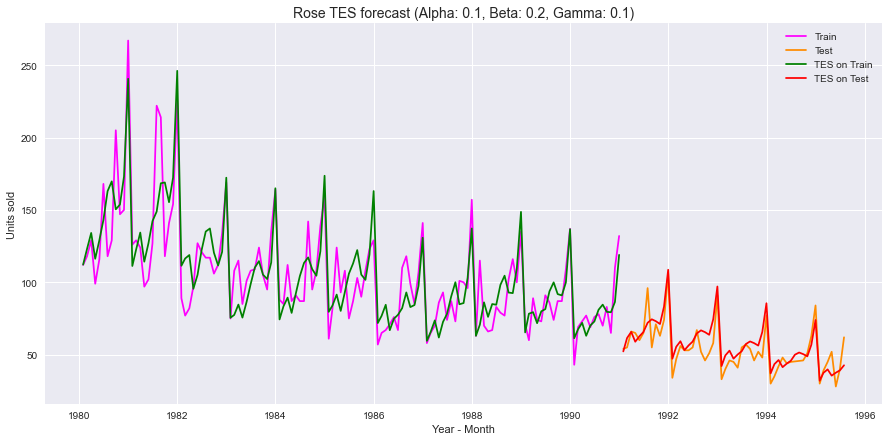

In [99]:
plt.figure(figsize=(15,7))

plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_rose', 0.1, 0.2, 0.1], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_rose', 0.1, 0.2, 0.1], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose TES forecast (Alpha: 0.1, Beta: 0.2, Gamma: 0.1)', fontsize=14)

plt.legend(loc='best')

### Autofit model of TES

In [100]:
model_TES_autofit = model_TES_2.fit(optimized=True,use_brute=True)

In [101]:
model_TES_autofit.params

{'smoothing_level': 0.06569374607191865,
 'smoothing_trend': 0.05192938504457338,
 'smoothing_seasonal': 3.879136202038614e-06,
 'damping_trend': nan,
 'initial_level': 54.10985491750761,
 'initial_trend': -0.33471965714896845,
 'initial_seasons': array([2.08282313, 2.36326666, 2.58210206, 2.25702695, 2.53757493,
        2.76639991, 3.04101803, 3.23434567, 3.06747277, 3.00164124,
        3.49893806, 4.82552476]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [102]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_2 = alpha
beta_7_2 = beta
gamma_7_2 = gamma

In [103]:
TES_train['predict_rose',alpha,beta,gamma] = model_TES_autofit.fittedvalues

TES_test['predict_rose',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Rose']))

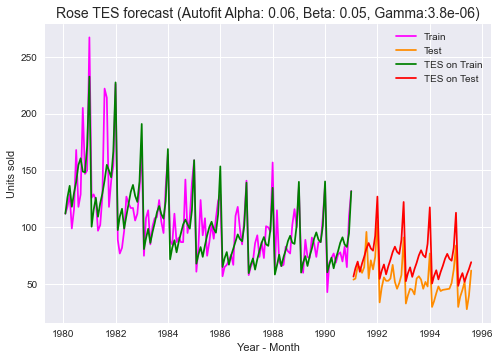

In [104]:
plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_rose',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_rose',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose TES forecast (Autofit Alpha: 0.06, Beta: 0.05, Gamma:3.8e-06)', fontsize=14)

plt.legend(loc='best')

In [105]:
rmse_rose_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_rose',alpha,beta,gamma],squared=False)
mape_rose_model7_train = MAPE(TES_train['Rose'],TES_train['predict_rose',alpha,beta,gamma])
        
rmse_rose_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_rose',alpha,beta,gamma],squared=False)
mape_rose_model7_test = MAPE(TES_test['Rose'],TES_test['predict_rose',alpha,beta,gamma])
        
resultsDf_7_2 = resultsDf_7_2.append({'Alpha':alpha,'Beta':beta,'Gamma':gamma,'Train RMSE':rmse_rose_model7_train
                                      ,'Train MAPE': mape_rose_model7_train,'Test RMSE':rmse_rose_model7_test
                                      ,'Test MAPE': mape_rose_model7_test}, ignore_index=True)


In [106]:
resultsDf_7_2.tail()

,Alpha,Beta,Gamma,Train RMSE,Train MAPE,Test RMSE,Test MAPE
996,1.000000,1.000000,0.700000,30724.126331,4617.55,23029.955358,11836.01
997,1.000000,1.000000,0.800000,1218.755446,493.75,9626.710890,8580.97
998,1.000000,1.000000,0.900000,14150.253251,2303.41,9691.905408,7916.16
999,1.000000,1.000000,1.000000,1768.254189,614.79,8138.618610,6811.03
1000,0.065694,0.051929,0.000004,18.405018,12.55,21.019341,35.16


In [107]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

,Alpha,Beta,Gamma,Train RMSE,Train MAPE,Test RMSE,Test MAPE
10,0.1,0.2,0.1,19.651464,14.31,9.171621,13.19
11,0.1,0.2,0.2,20.140683,14.66,9.493832,13.68
151,0.2,0.6,0.2,22.793871,17.02,9.682585,13.71
142,0.2,0.5,0.3,23.300524,17.35,9.885717,14.21
12,0.1,0.2,0.3,20.725703,14.88,9.896169,14.16


In [108]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

,Alpha,Beta,Gamma,Train RMSE,Train MAPE,Test RMSE,Test MAPE
10,0.1,0.2,0.1,19.651464,14.31,9.171621,13.19
243,0.3,0.5,0.4,25.873405,17.54,10.375280,13.26
223,0.3,0.3,0.4,24.209084,16.78,10.169702,13.67
11,0.1,0.2,0.2,20.140683,14.66,9.493832,13.68
151,0.2,0.6,0.2,22.793871,17.02,9.682585,13.71


### Model Evaluation

In [109]:
resultsDf_7_ro = pd.DataFrame({'Test RMSE': [resultsDf_7_2['Test RMSE'][11],resultsDf_7_2['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_2['Test MAPE'][11],resultsDf_7_2['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.1, Beta 0.2, Gamma 0.1','TES Alpha 0.06, Beta 0.05, Gamma 3.8e-06'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_7_ro])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10
SimpleAverage,53.460350,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451364,19.49
6 point TMA,14.566269,20.82
9 point TMA,14.727594,21.01
SES Alpha 0.01,36.796004,63.88
"DES Alpha 0.01, Beta 3.2e-05",15.706968,24.12
"DES Alpha 0.10, Beta 0.10",37.056911,64.02


In [110]:
rose_resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE,Test MAPE
"TES Alpha 0.1, Beta 0.2, Gamma 0.1",9.493832,13.68
2 point TMA,11.529278,13.54
4 point TMA,14.451364,19.49
6 point TMA,14.566269,20.82
9 point TMA,14.727594,21.01
RegressionOnTime,15.268885,22.82
"DES Alpha 0.01, Beta 3.2e-05",15.706968,24.12
"TES Alpha 0.06, Beta 0.05, Gamma 3.8e-06",21.019341,35.16
SES Alpha 0.01,36.796004,63.88
"DES Alpha 0.10, Beta 0.10",37.056911,64.02


### Ploting all the above models

Text(0.5, 1.0, 'ROSE : Forecast Vs Actual Test Data')

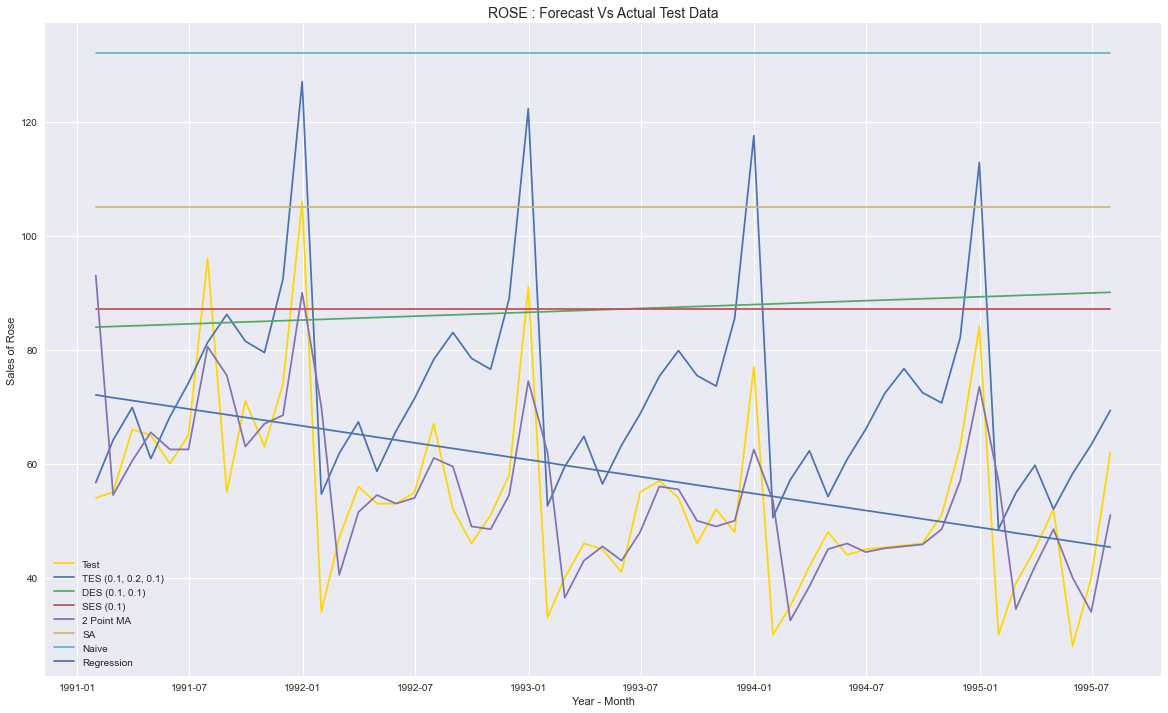

In [111]:
plt.figure(figsize=(20,12))

plt.plot(TES_test['Rose'], label='Test', color = 'gold')

#TES
plt.plot(TES_test['predict_rose',alpha_7_2,beta_7_2,gamma_7_2],  label='TES (0.1, 0.2, 0.1)')

#DES
plt.plot(DES_test['predict_rose',0.1,0.1],  label='DES (0.1, 0.1)')

#SES
plt.plot(SES_test['predict_rose'],  label='SES (0.1)')

#MA
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'],  label='2 Point MA')

#SA
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SA')

#Naive
plt.plot(NaiveModel_test['rose_naive'], label='Naive')

#Regression
plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Sales of Rose')
plt.title('ROSE : Forecast Vs Actual Test Data', fontsize=14)

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
#### Note: Stationarity should be checked at alpha = 0.05.
The Augmented Dicky-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [112]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

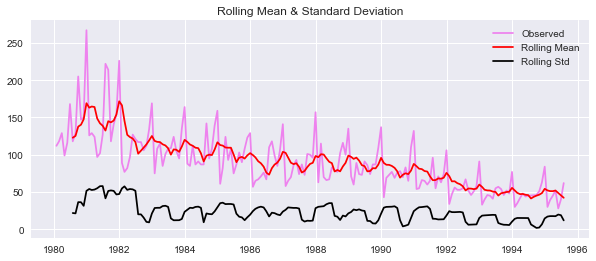

Results of Dickey-Fuller Test:
Test Statistic                  -1.876719
p-value                          0.343091
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [113]:
plt.figure(figsize=(10,4))
test_stationarity(df['Rose'], 'violet')

We see that at 5% significant level the Time Series is non-stationary.

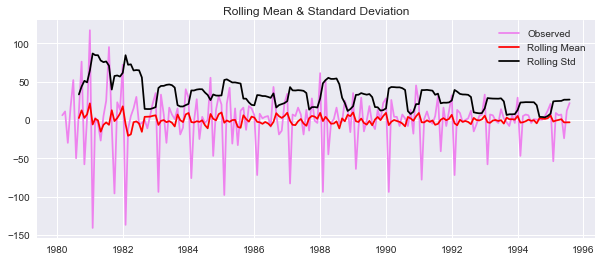

Results of Dickey-Fuller Test:
Test Statistic                -8.044395e+00
p-value                        1.810868e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [114]:
plt.figure(figsize=(10,4))
test_stationarity(df['Rose'].diff().dropna(), 'violet')

At difference of order 1, Rose Time Series is stationary with no trend. Got visible seasoality (additive or mutiplicative?)

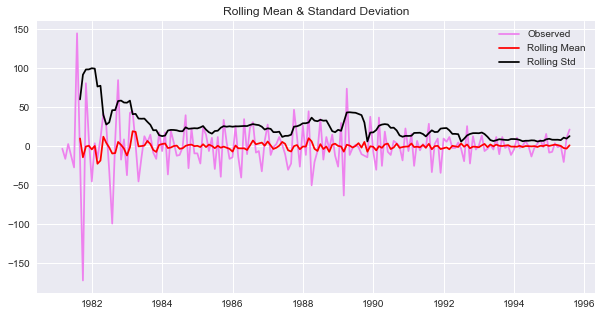

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [115]:
plt.figure(figsize=(10,5))
test_stationarity((df['Rose'].diff(12).dropna()).diff().dropna(), 'violet')

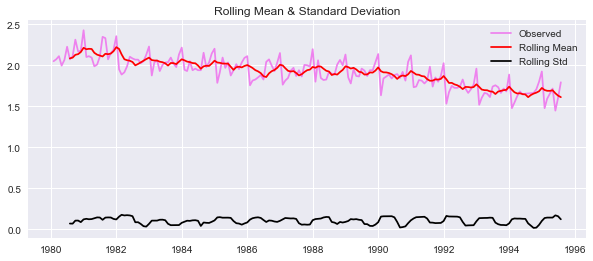

Results of Dickey-Fuller Test:
Test Statistic                  -0.422555
p-value                          0.906264
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [116]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Rose']), 'violet')

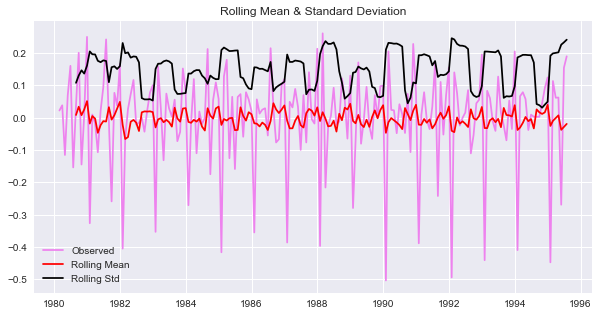

Results of Dickey-Fuller Test:
Test Statistic                -8.669696e+00
p-value                        4.581847e-14
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64 



In [117]:
plt.figure(figsize=(10,5))
test_stationarity(np.log10(df['Rose']).diff().dropna(), 'violet')

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.
### ACF plots :

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 720x360 with 0 Axes>

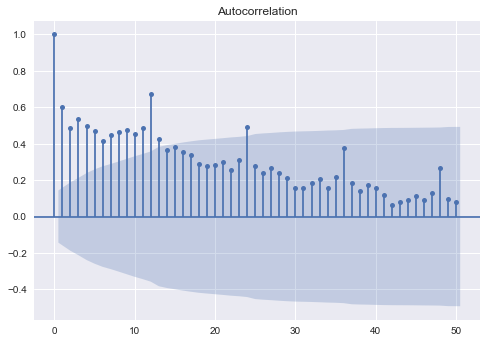

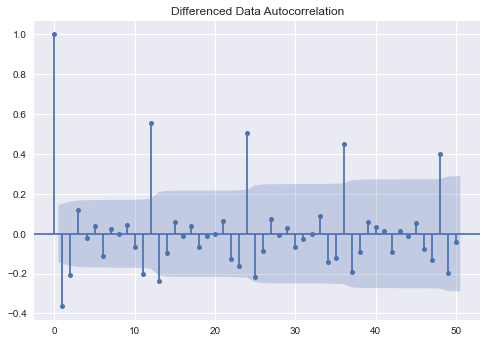

In [119]:
plt.figure(figsize=(10,5))
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

### PACF Plots

<Figure size 720x360 with 0 Axes>

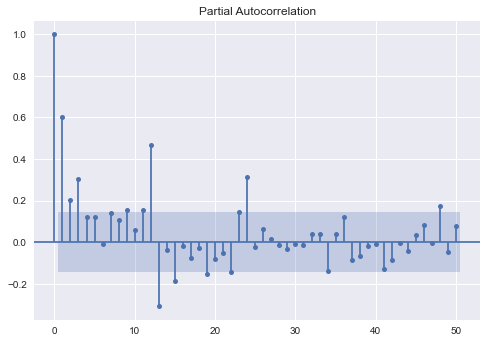

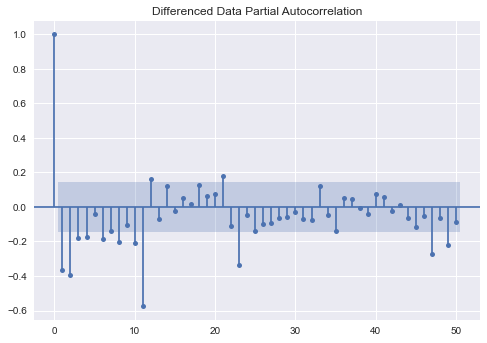

In [120]:
plt.figure(figsize=(10,5))
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.
### AUTO SARIMA on original data
#### As the data contains seasonality component we will be building SARIMA model, rather than ARIMA.

In [121]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

In [122]:
import itertools
p = q = range(0,4)
d = range(1,2)
D = range(1,2)


pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [123]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose

,param,seasonal,AIC


In [124]:
import statsmodels.api as sm

In [125]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438279514
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301644053
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.868701477606


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:3516.1866813134493
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.3269589658807
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.3375383601636
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.7332182654534


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:3906.037633549953
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.5132698374416
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.3390729144091
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282244224136


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:2603.9561106566007
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:752.3958122739762
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:748.3165246490003
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:748.9721713372103


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:2713.4607337408593
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1113.7663133563728
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:915.073060671733
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:790.9032809266455


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 1, 3, 12)7 - AIC:3052.168975878899
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:944.2456655532176
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:929.3362488520044
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:792.7161670333824


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 1, 3, 12)7 - AIC:3249.6012568435526
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:810.3194350158662
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:804.1555755139157
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:782.1538715431112


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 1, 3, 12)7 - AIC:2611.141872914227
SARIMA(0, 1, 1)x(3, 1, 0, 12)7 - AIC:708.0834235838853
SARIMA(0, 1, 1)x(3, 1, 1, 12)7 - AIC:700.0095711665518
SARIMA(0, 1, 1)x(3, 1, 2, 12)7 - AIC:701.2070619831072
SARIMA(0, 1, 1)x(3, 1, 3, 12)7 - AIC:2773.382136368748
SARIMA(0, 1, 2)x(0, 1, 0, 12)7 - AIC:1098.6598024292612
SARIMA(0, 1, 2)x(0, 1, 1, 12)7 - AIC:904.5003488475932
SARIMA(0, 1, 2)x(0, 1, 2, 12)7 - AIC:784.0140955703686
SARIMA(0, 1, 2)x(0, 1, 3, 12)7 - AIC:2557.087728990181
SARIMA(0, 1, 2)x(1, 1, 0, 12)7 - AIC:941.5256923362788
SARIMA(0, 1, 2)x(1, 1, 1, 12)7 - AIC:915.273113409056
SARIMA(0, 1, 2)x(1, 1, 2, 12)7 - AIC:785.8237144293565
SARIMA(0, 1, 2)x(1, 1, 3, 12)7 - AIC:3176.1128437043353
SARIMA(0, 1, 2)x(2, 1, 0, 12)7 - AIC:811.548943817834
SARIMA(0, 1, 2)x(2, 1, 1, 12)7 - AIC:805.1158488729624
SARIMA(0, 1, 2)x(2, 1, 2, 12)7 - AIC:774.9691198422099
SARIMA(0, 1, 2)x(2, 1, 3, 12)7 - AIC:2652.9607942797097
SARIMA(0, 1, 2)x(3, 1, 0, 12)7 - AIC:709.6122118546598


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 1, 1, 12)7 - AIC:701.7009897857963
SARIMA(0, 1, 2)x(3, 1, 2, 12)7 - AIC:703.3947032359943


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 1, 3, 12)7 - AIC:1606.911280137279
SARIMA(0, 1, 3)x(0, 1, 0, 12)7 - AIC:1088.3764710136468
SARIMA(0, 1, 3)x(0, 1, 1, 12)7 - AIC:897.1317873892932
SARIMA(0, 1, 3)x(0, 1, 2, 12)7 - AIC:778.4427567851856


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 1, 3, 12)7 - AIC:3224.772202155239
SARIMA(0, 1, 3)x(1, 1, 0, 12)7 - AIC:943.5043088714341
SARIMA(0, 1, 3)x(1, 1, 1, 12)7 - AIC:904.9319970114595
SARIMA(0, 1, 3)x(1, 1, 2, 12)7 - AIC:780.2386079742683
SARIMA(0, 1, 3)x(1, 1, 3, 12)7 - AIC:3189.3302481997885
SARIMA(0, 1, 3)x(2, 1, 0, 12)7 - AIC:813.4051893208884
SARIMA(0, 1, 3)x(2, 1, 1, 12)7 - AIC:806.4667725192635
SARIMA(0, 1, 3)x(2, 1, 2, 12)7 - AIC:767.2243745824819


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 1, 3, 12)7 - AIC:3037.7416833886914
SARIMA(0, 1, 3)x(3, 1, 0, 12)7 - AIC:711.7218300989923
SARIMA(0, 1, 3)x(3, 1, 1, 12)7 - AIC:703.6693125236384
SARIMA(0, 1, 3)x(3, 1, 2, 12)7 - AIC:705.3781252228811


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 1, 3, 12)7 - AIC:2959.5890391598705
SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:1164.5103013842067
SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:953.8813887547306
SARIMA(1, 1, 0)x(0, 1, 2, 12)7 - AIC:828.839883282113


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 1, 3, 12)7 - AIC:3045.0617408693665
SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:962.9698535735688
SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:964.8516934823627
SARIMA(1, 1, 0)x(1, 1, 2, 12)7 - AIC:830.3075804967712


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 1, 3, 12)7 - AIC:3404.0853103985764
SARIMA(1, 1, 0)x(2, 1, 0, 12)7 - AIC:826.9995808091124
SARIMA(1, 1, 0)x(2, 1, 1, 12)7 - AIC:823.826110278099
SARIMA(1, 1, 0)x(2, 1, 2, 12)7 - AIC:825.0437253042475
SARIMA(1, 1, 0)x(2, 1, 3, 12)7 - AIC:3000.9701765215304
SARIMA(1, 1, 0)x(3, 1, 0, 12)7 - AIC:727.3669084126892
SARIMA(1, 1, 0)x(3, 1, 1, 12)7 - AIC:728.9034690439004
SARIMA(1, 1, 0)x(3, 1, 2, 12)7 - AIC:721.9926158686138


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 1, 3, 12)7 - AIC:2650.3276860010897
SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:1110.6209464400317
SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:914.0453844988074
SARIMA(1, 1, 1)x(0, 1, 2, 12)7 - AIC:792.3411370856635


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 1, 3, 12)7 - AIC:3508.8475222348343
SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:933.297421682369
SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:927.2920638200435
SARIMA(1, 1, 1)x(1, 1, 2, 12)7 - AIC:794.192970668339


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 1, 3, 12)7 - AIC:3176.538128588861
SARIMA(1, 1, 1)x(2, 1, 0, 12)7 - AIC:799.947425832107
SARIMA(1, 1, 1)x(2, 1, 1, 12)7 - AIC:791.9065436346552
SARIMA(1, 1, 1)x(2, 1, 2, 12)7 - AIC:783.8990950666122


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 1, 3, 12)7 - AIC:4782.34750624908
SARIMA(1, 1, 1)x(3, 1, 0, 12)7 - AIC:702.1669810479294
SARIMA(1, 1, 1)x(3, 1, 1, 12)7 - AIC:693.9370840858745
SARIMA(1, 1, 1)x(3, 1, 2, 12)7 - AIC:695.0475049691054
SARIMA(1, 1, 1)x(3, 1, 3, 12)7 - AIC:2814.020274207776
SARIMA(1, 1, 2)x(0, 1, 0, 12)7 - AIC:1096.3571024751675
SARIMA(1, 1, 2)x(0, 1, 1, 12)7 - AIC:906.4966907625364
SARIMA(1, 1, 2)x(0, 1, 2, 12)7 - AIC:785.9832738793687


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 1, 3, 12)7 - AIC:572.5529768670438
SARIMA(1, 1, 2)x(1, 1, 0, 12)7 - AIC:934.8870392437676
SARIMA(1, 1, 2)x(1, 1, 1, 12)7 - AIC:917.2527818412017
SARIMA(1, 1, 2)x(1, 1, 2, 12)7 - AIC:787.784397022569


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 3, 12)7 - AIC:3178.979030114988
SARIMA(1, 1, 2)x(2, 1, 0, 12)7 - AIC:801.9382052144458
SARIMA(1, 1, 2)x(2, 1, 1, 12)7 - AIC:791.9171161968218
SARIMA(1, 1, 2)x(2, 1, 2, 12)7 - AIC:776.9401095620248
SARIMA(1, 1, 2)x(2, 1, 3, 12)7 - AIC:2622.022405932076
SARIMA(1, 1, 2)x(3, 1, 0, 12)7 - AIC:703.8075522582235
SARIMA(1, 1, 2)x(3, 1, 1, 12)7 - AIC:696.1085407023899
SARIMA(1, 1, 2)x(3, 1, 2, 12)7 - AIC:697.0470102816026
SARIMA(1, 1, 2)x(3, 1, 3, 12)7 - AIC:3138.4633531168297
SARIMA(1, 1, 3)x(0, 1, 0, 12)7 - AIC:1088.0914860031187
SARIMA(1, 1, 3)x(0, 1, 1, 12)7 - AIC:895.9867971322674
SARIMA(1, 1, 3)x(0, 1, 2, 12)7 - AIC:780.3059561929811
SARIMA(1, 1, 3)x(0, 1, 3, 12)7 - AIC:2788.6811796857705
SARIMA(1, 1, 3)x(1, 1, 0, 12)7 - AIC:936.6664092075409
SARIMA(1, 1, 3)x(1, 1, 1, 12)7 - AIC:906.765366035998
SARIMA(1, 1, 3)x(1, 1, 2, 12)7 - AIC:782.102770458237


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 1, 3, 12)7 - AIC:3056.1659243386466
SARIMA(1, 1, 3)x(2, 1, 0, 12)7 - AIC:803.6616207211565
SARIMA(1, 1, 3)x(2, 1, 1, 12)7 - AIC:793.9162137720222
SARIMA(1, 1, 3)x(2, 1, 2, 12)7 - AIC:767.475354220671
SARIMA(1, 1, 3)x(2, 1, 3, 12)7 - AIC:3426.175951386475
SARIMA(1, 1, 3)x(3, 1, 0, 12)7 - AIC:702.9343086880154
SARIMA(1, 1, 3)x(3, 1, 1, 12)7 - AIC:696.4192757825966
SARIMA(1, 1, 3)x(3, 1, 2, 12)7 - AIC:698.0866364458961
SARIMA(1, 1, 3)x(3, 1, 3, 12)7 - AIC:2514.819475676134
SARIMA(2, 1, 0)x(0, 1, 0, 12)7 - AIC:1133.246770439665
SARIMA(2, 1, 0)x(0, 1, 1, 12)7 - AIC:949.5332566879779
SARIMA(2, 1, 0)x(0, 1, 2, 12)7 - AIC:827.1933387102613
SARIMA(2, 1, 0)x(0, 1, 3, 12)7 - AIC:2852.159019435511
SARIMA(2, 1, 0)x(1, 1, 0, 12)7 - AIC:950.2637728228547
SARIMA(2, 1, 0)x(1, 1, 1, 12)7 - AIC:952.2623518887128
SARIMA(2, 1, 0)x(1, 1, 2, 12)7 - AIC:828.7198703608763


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 1, 3, 12)7 - AIC:3345.61116755899
SARIMA(2, 1, 0)x(2, 1, 0, 12)7 - AIC:814.2969261794622
SARIMA(2, 1, 0)x(2, 1, 1, 12)7 - AIC:808.5100914918243
SARIMA(2, 1, 0)x(2, 1, 2, 12)7 - AIC:810.0074804178433


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 1, 3, 12)7 - AIC:3151.5912451934337
SARIMA(2, 1, 0)x(3, 1, 0, 12)7 - AIC:714.7788976435195
SARIMA(2, 1, 0)x(3, 1, 1, 12)7 - AIC:705.0868021188392
SARIMA(2, 1, 0)x(3, 1, 2, 12)7 - AIC:707.1846914971075


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 1, 3, 12)7 - AIC:2222.415740471354
SARIMA(2, 1, 1)x(0, 1, 0, 12)7 - AIC:1107.1166362359436
SARIMA(2, 1, 1)x(0, 1, 1, 12)7 - AIC:915.123647912146
SARIMA(2, 1, 1)x(0, 1, 2, 12)7 - AIC:794.27996262777


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 1, 3, 12)7 - AIC:3342.254265442612
SARIMA(2, 1, 1)x(1, 1, 0, 12)7 - AIC:926.3197036268141
SARIMA(2, 1, 1)x(1, 1, 1, 12)7 - AIC:928.3197020908619
SARIMA(2, 1, 1)x(1, 1, 2, 12)7 - AIC:796.1300001391683


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 1, 3, 12)7 - AIC:3232.1840132030106
SARIMA(2, 1, 1)x(2, 1, 0, 12)7 - AIC:792.894075393372
SARIMA(2, 1, 1)x(2, 1, 1, 12)7 - AIC:784.8928009914792
SARIMA(2, 1, 1)x(2, 1, 2, 12)7 - AIC:785.8335673952027


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 1, 3, 12)7 - AIC:3722.5701482500263
SARIMA(2, 1, 1)x(3, 1, 0, 12)7 - AIC:694.9386753369603
SARIMA(2, 1, 1)x(3, 1, 1, 12)7 - AIC:687.9965349842275
SARIMA(2, 1, 1)x(3, 1, 2, 12)7 - AIC:688.9098768459635
SARIMA(2, 1, 1)x(3, 1, 3, 12)7 - AIC:3192.080095721048
SARIMA(2, 1, 2)x(0, 1, 0, 12)7 - AIC:1099.4823964821483
SARIMA(2, 1, 2)x(0, 1, 1, 12)7 - AIC:904.7004130328344
SARIMA(2, 1, 2)x(0, 1, 2, 12)7 - AIC:784.1409514958576


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 1, 3, 12)7 - AIC:104.42252953373462
SARIMA(2, 1, 2)x(1, 1, 0, 12)7 - AIC:925.3705668134864
SARIMA(2, 1, 2)x(1, 1, 1, 12)7 - AIC:915.6932514239375
SARIMA(2, 1, 2)x(1, 1, 2, 12)7 - AIC:785.8283110198896
SARIMA(2, 1, 2)x(1, 1, 3, 12)7 - AIC:3230.400931496352
SARIMA(2, 1, 2)x(2, 1, 0, 12)7 - AIC:794.7799442940219
SARIMA(2, 1, 2)x(2, 1, 1, 12)7 - AIC:783.7036522819554
SARIMA(2, 1, 2)x(2, 1, 2, 12)7 - AIC:776.9961008321861
SARIMA(2, 1, 2)x(2, 1, 3, 12)7 - AIC:3392.2270749684426
SARIMA(2, 1, 2)x(3, 1, 0, 12)7 - AIC:696.8666403397502
SARIMA(2, 1, 2)x(3, 1, 1, 12)7 - AIC:688.2483972947624
SARIMA(2, 1, 2)x(3, 1, 2, 12)7 - AIC:689.7855699158782


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 1, 3, 12)7 - AIC:3228.4397418978456
SARIMA(2, 1, 3)x(0, 1, 0, 12)7 - AIC:1089.536865239576
SARIMA(2, 1, 3)x(0, 1, 1, 12)7 - AIC:897.1805260408195
SARIMA(2, 1, 3)x(0, 1, 2, 12)7 - AIC:779.1301959275822


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 1, 3, 12)7 - AIC:3171.385291912878
SARIMA(2, 1, 3)x(1, 1, 0, 12)7 - AIC:919.0020071157448
SARIMA(2, 1, 3)x(1, 1, 1, 12)7 - AIC:902.2459019753618
SARIMA(2, 1, 3)x(1, 1, 2, 12)7 - AIC:780.650831741657


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 1, 3, 12)7 - AIC:3133.9959166307303
SARIMA(2, 1, 3)x(2, 1, 0, 12)7 - AIC:792.2339221929277
SARIMA(2, 1, 3)x(2, 1, 1, 12)7 - AIC:787.7533467391253
SARIMA(2, 1, 3)x(2, 1, 2, 12)7 - AIC:769.496211063473


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 1, 3, 12)7 - AIC:3100.1050247935013
SARIMA(2, 1, 3)x(3, 1, 0, 12)7 - AIC:694.5858505542807
SARIMA(2, 1, 3)x(3, 1, 1, 12)7 - AIC:690.1306759401837
SARIMA(2, 1, 3)x(3, 1, 2, 12)7 - AIC:692.3257464540277
SARIMA(2, 1, 3)x(3, 1, 3, 12)7 - AIC:3132.2342831872766
SARIMA(3, 1, 0)x(0, 1, 0, 12)7 - AIC:1119.1809056019003
SARIMA(3, 1, 0)x(0, 1, 1, 12)7 - AIC:943.5417009330914
SARIMA(3, 1, 0)x(0, 1, 2, 12)7 - AIC:822.4469311120758


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 1, 3, 12)7 - AIC:3550.4519213546187
SARIMA(3, 1, 0)x(1, 1, 0, 12)7 - AIC:930.6943146015019
SARIMA(3, 1, 0)x(1, 1, 1, 12)7 - AIC:932.4901496959154
SARIMA(3, 1, 0)x(1, 1, 2, 12)7 - AIC:824.1779575729075


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 1, 3, 12)7 - AIC:3440.3277255318417
SARIMA(3, 1, 0)x(2, 1, 0, 12)7 - AIC:803.7674514642837
SARIMA(3, 1, 0)x(2, 1, 1, 12)7 - AIC:794.8634035222334
SARIMA(3, 1, 0)x(2, 1, 2, 12)7 - AIC:796.6369790764376


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 1, 3, 12)7 - AIC:3025.8149747975567
SARIMA(3, 1, 0)x(3, 1, 0, 12)7 - AIC:704.854657059677
SARIMA(3, 1, 0)x(3, 1, 1, 12)7 - AIC:696.8642292308797
SARIMA(3, 1, 0)x(3, 1, 2, 12)7 - AIC:699.0912744278394
SARIMA(3, 1, 0)x(3, 1, 3, 12)7 - AIC:3167.574798815693
SARIMA(3, 1, 1)x(0, 1, 0, 12)7 - AIC:1099.633086695818
SARIMA(3, 1, 1)x(0, 1, 1, 12)7 - AIC:915.5227261301478
SARIMA(3, 1, 1)x(0, 1, 2, 12)7 - AIC:795.1857811460995
SARIMA(3, 1, 1)x(0, 1, 3, 12)7 - AIC:3742.697748361908
SARIMA(3, 1, 1)x(1, 1, 0, 12)7 - AIC:914.5580669315476
SARIMA(3, 1, 1)x(1, 1, 1, 12)7 - AIC:916.4809813444081
SARIMA(3, 1, 1)x(1, 1, 2, 12)7 - AIC:796.8065566399058


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 1, 3, 12)7 - AIC:3557.008345191761
SARIMA(3, 1, 1)x(2, 1, 0, 12)7 - AIC:785.367877155668
SARIMA(3, 1, 1)x(2, 1, 1, 12)7 - AIC:777.3603962857908
SARIMA(3, 1, 1)x(2, 1, 2, 12)7 - AIC:777.5853448598594


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 1, 3, 12)7 - AIC:2874.400002265289
SARIMA(3, 1, 1)x(3, 1, 0, 12)7 - AIC:688.5642274590609
SARIMA(3, 1, 1)x(3, 1, 1, 12)7 - AIC:681.3628077572603
SARIMA(3, 1, 1)x(3, 1, 2, 12)7 - AIC:682.320697221383


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 1, 3, 12)7 - AIC:3634.7342983561475
SARIMA(3, 1, 2)x(0, 1, 0, 12)7 - AIC:1097.5317771850919
SARIMA(3, 1, 2)x(0, 1, 1, 12)7 - AIC:906.5708112110974
SARIMA(3, 1, 2)x(0, 1, 2, 12)7 - AIC:787.9521881344239


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 1, 3, 12)7 - AIC:3458.3766168325237
SARIMA(3, 1, 2)x(1, 1, 0, 12)7 - AIC:915.6058875867499
SARIMA(3, 1, 2)x(1, 1, 1, 12)7 - AIC:917.4091458206764
SARIMA(3, 1, 2)x(1, 1, 2, 12)7 - AIC:789.5119881167092


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 1, 3, 12)7 - AIC:3134.3945178182125
SARIMA(3, 1, 2)x(2, 1, 0, 12)7 - AIC:786.7471041580857
SARIMA(3, 1, 2)x(2, 1, 1, 12)7 - AIC:777.2616184673345
SARIMA(3, 1, 2)x(2, 1, 2, 12)7 - AIC:778.7252770170674
SARIMA(3, 1, 2)x(2, 1, 3, 12)7 - AIC:3157.604188240345
SARIMA(3, 1, 2)x(3, 1, 0, 12)7 - AIC:687.938484624294
SARIMA(3, 1, 2)x(3, 1, 1, 12)7 - AIC:683.2117001707601
SARIMA(3, 1, 2)x(3, 1, 2, 12)7 - AIC:684.0141994927819
SARIMA(3, 1, 2)x(3, 1, 3, 12)7 - AIC:3171.5775318172373
SARIMA(3, 1, 3)x(0, 1, 0, 12)7 - AIC:1090.4366088786837
SARIMA(3, 1, 3)x(0, 1, 1, 12)7 - AIC:899.4678956920802
SARIMA(3, 1, 3)x(0, 1, 2, 12)7 - AIC:780.7435330993222


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 1, 3, 12)7 - AIC:592.526851494385
SARIMA(3, 1, 3)x(1, 1, 0, 12)7 - AIC:919.3449764853902
SARIMA(3, 1, 3)x(1, 1, 1, 12)7 - AIC:907.6982326685783
SARIMA(3, 1, 3)x(1, 1, 2, 12)7 - AIC:782.5615071315666


C:\Users\terrorist\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 1, 3, 12)7 - AIC:587.2504469222723
SARIMA(3, 1, 3)x(2, 1, 0, 12)7 - AIC:785.2892962169428
SARIMA(3, 1, 3)x(2, 1, 1, 12)7 - AIC:777.774796330799
SARIMA(3, 1, 3)x(2, 1, 2, 12)7 - AIC:770.2519329537115
SARIMA(3, 1, 3)x(2, 1, 3, 12)7 - AIC:511.2343134704912
SARIMA(3, 1, 3)x(3, 1, 0, 12)7 - AIC:689.5019361568352
SARIMA(3, 1, 3)x(3, 1, 1, 12)7 - AIC:681.6100831282388
SARIMA(3, 1, 3)x(3, 1, 2, 12)7 - AIC:681.9641195517906
SARIMA(3, 1, 3)x(3, 1, 3, 12)7 - AIC:653.8409168789173


In [126]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head(10)

,param,seasonal,AIC
163,"(2, 1, 2)","(0, 1, 3, 12)",104.422530
251,"(3, 1, 3)","(2, 1, 3, 12)",511.234313
99,"(1, 1, 2)","(0, 1, 3, 12)",572.552977
247,"(3, 1, 3)","(1, 1, 3, 12)",587.250447
243,"(3, 1, 3)","(0, 1, 3, 12)",592.526851
255,"(3, 1, 3)","(3, 1, 3, 12)",653.840917
221,"(3, 1, 1)","(3, 1, 1, 12)",681.362808
253,"(3, 1, 3)","(3, 1, 1, 12)",681.610083
254,"(3, 1, 3)","(3, 1, 2, 12)",681.964120
222,"(3, 1, 1)","(3, 1, 2, 12)",682.320697


In [127]:
auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -331.681
Date:                            Sun, 10 Oct 2021   AIC                            681.363
Time:                                    18:59:42   BIC                            702.801
Sample:                                         0   HQIC                           689.958
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0173      0.151      0.114      0.909      -0.279       0.314
ar.L2         -0.0426      0.141   

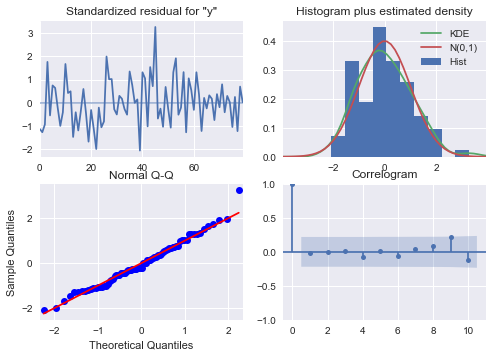

In [128]:
results_auto_SARIMA_rose.plot_diagnostics()
plt.show()

In [129]:
pred_dynamic = results_auto_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [130]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_rose = results_auto_SARIMA_rose.get_forecast(steps=len(SARIMA_test['Rose']), alpha=0.05)

In [131]:
predicted_auto_SARIMA_rose.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,45.230490,14.458298,16.892746,73.568234
1,63.053692,14.503247,34.627850,91.479533
2,68.119687,14.453297,39.791745,96.447628
3,61.826875,14.449534,33.506309,90.147441
4,68.437081,14.470038,40.076328,96.797835


In [132]:
# Extract the predicted and true values of our time series
rose_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_auto_forecasted'] = predicted_auto_SARIMA_rose.predicted_mean
SARIMA_test.head()

,Rose,rose_auto_forecasted
Time_Stamp,,
1991-01-31,54.0,45.230490
1991-02-28,55.0,63.053692
1991-03-31,66.0,68.119687
1991-04-30,65.0,61.826875
1991-05-31,60.0,68.437081


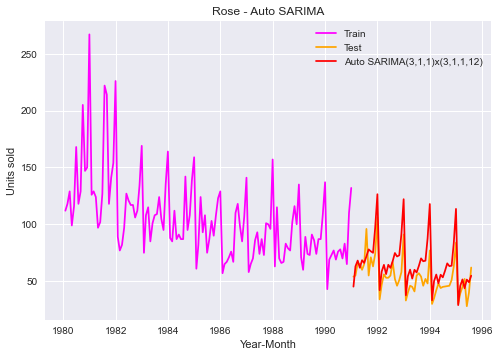

In [133]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_auto_forecasted'], color='red', label='Auto SARIMA(3,1,1)x(3,1,1,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA')
plt.legend(loc='best')

In [134]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_auto_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_auto_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the SRose Testing Data:  RMSE is 16.824 and MAPE is 25.48


In [135]:
resultsDf_8_rose1 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Auto SARIMA(3,1,1)x(3,1,1,12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose1])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10
SimpleAverage,53.460350,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451364,19.49
6 point TMA,14.566269,20.82
9 point TMA,14.727594,21.01
SES Alpha 0.01,36.796004,63.88
"DES Alpha 0.01, Beta 3.2e-05",15.706968,24.12
"DES Alpha 0.10, Beta 0.10",37.056911,64.02


### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.
Let us look at the ACF and the PACF plots.

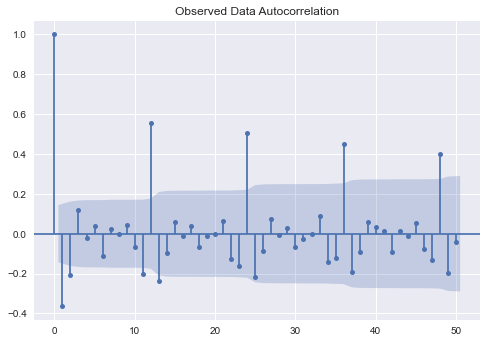

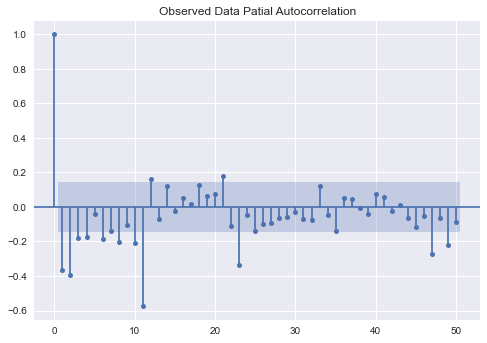

In [136]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off quickly. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

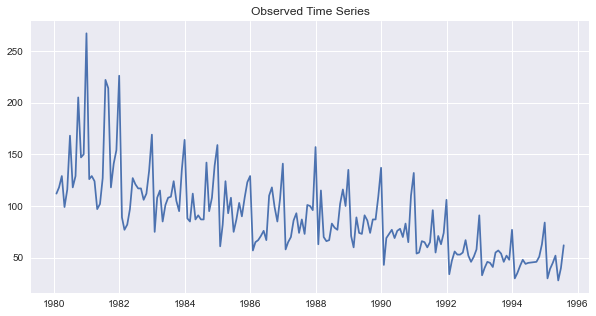

In [137]:
plt.figure(figsize=(10,5))
plt.plot(df['Rose'])
plt.title ('Observed Time Series');

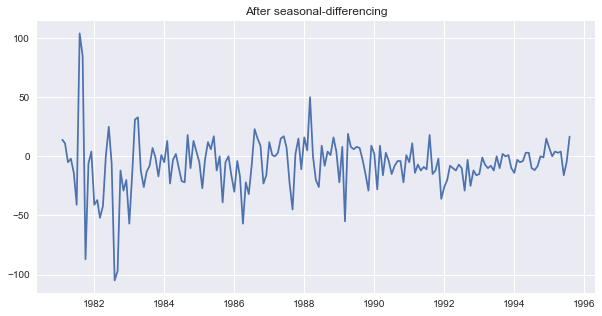

In [138]:
plt.figure(figsize=(10,5))
plt.plot(df['Rose'].diff(12).dropna())
plt.title ('After seasonal-differencing');

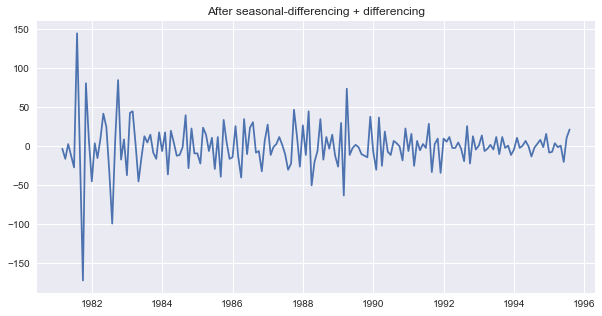

In [139]:
plt.figure(figsize=(10,5))
plt.plot((df['Rose'].diff(12).dropna()).diff().dropna())
plt.title ('After seasonal-differencing + differencing');

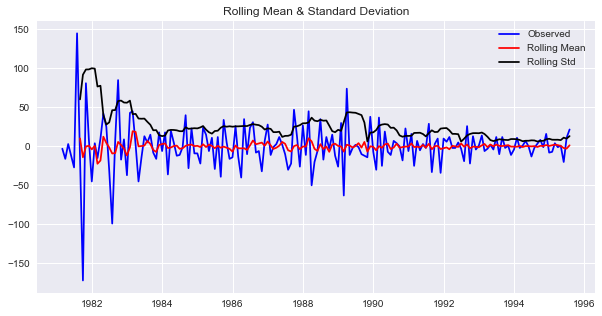

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [140]:
plt.figure(figsize=(10,5))
test_stationarity((df['Rose'].diff(12).dropna()).diff().dropna(),'blue')

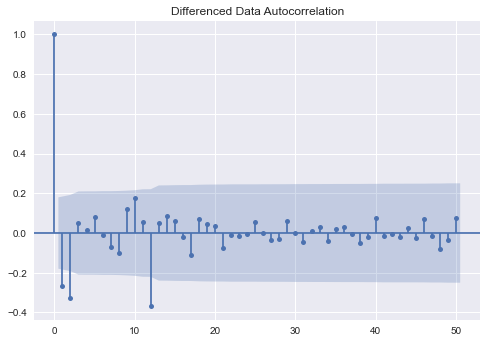

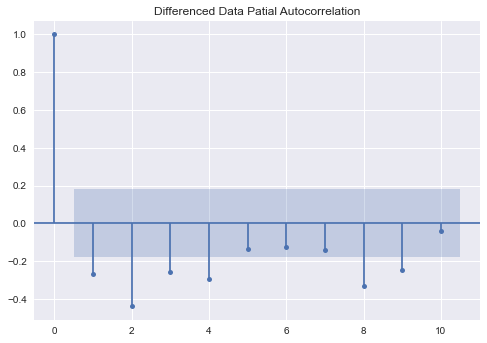

In [141]:
plot_acf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=10,title='Differenced Data Patial Autocorrelation')
plt.show()

- Here we have taken alpha = 0.05 and seasonal period as 12.


- From the PACF plot it can be seen that till lag 4 is significant before cut-off, so AR term ‘p = 4’ is chosen. At seasonal lag of 12, it cuts off, so keep seasonal AR ‘P = 0’.


- From ACF plot, lag 1 and 2 are significant before it cuts off, so lets keep MA term ‘q = 1’ and at seasonal lag of 12, a significant lag is apparent, so lets keep ‘Q = 1'.


- The final selected terms for SARIMA model is (4, 1, 1)x(0, 1, 1, 12), as inferred from the ACF and PACF plots.

In [142]:
manual_SARIMA_rose = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose = manual_SARIMA_rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -384.369
Date:                            Sun, 10 Oct 2021   AIC                            786.737
Time:                                    18:59:59   BIC                            809.433
Sample:                                         0   HQIC                           795.898
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.132     -6.814      0.000      -1.155      -0.639
ar.L2          0.0165      0.171   

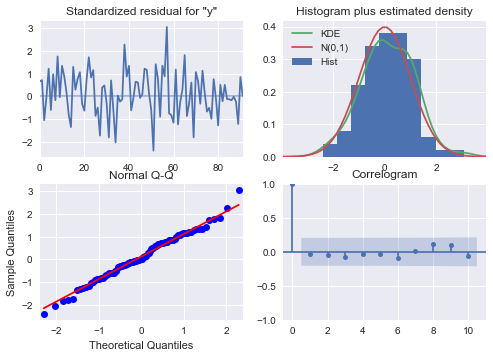

In [143]:
results_manual_SARIMA_rose.plot_diagnostics()
plt.show()

In [144]:
pred_dynamic = results_manual_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [145]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_rose = results_manual_SARIMA_rose.get_forecast(steps=len(test['Rose']), alpha=0.05)

In [146]:
predicted_manual_SARIMA_rose.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,44.733041,15.552666,14.250375,75.215707
1,64.208694,16.000767,32.847766,95.569622
2,65.110690,16.074606,33.605040,96.616339
3,68.453063,16.150996,36.797692,100.108433
4,61.423433,16.154556,29.761085,93.085781


In [147]:
rose_log_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_manual_forecasted'] = predicted_manual_SARIMA_rose.predicted_mean
SARIMA_test.head()

,Rose,rose_auto_forecasted,rose_manual_forecasted
Time_Stamp,,,
1991-01-31,54.0,45.230490,44.733041
1991-02-28,55.0,63.053692,64.208694
1991-03-31,66.0,68.119687,65.110690
1991-04-30,65.0,61.826875,68.453063
1991-05-31,60.0,68.437081,61.423433


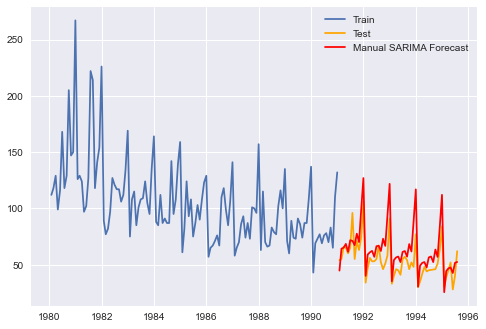

In [148]:
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_manual_forecasted'], color='red', label='Manual SARIMA Forecast')

plt.legend(loc='best')

In [149]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_manual_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_manual_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 15.377 and MAPE is 22.16


In [150]:
resultsDf_8_rose3 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Manual SARIMA(4,1,2)x(0,1,1,12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose3])
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10
SimpleAverage,53.460350,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451364,19.49
6 point TMA,14.566269,20.82
9 point TMA,14.727594,21.01
SES Alpha 0.01,36.796004,63.88
"DES Alpha 0.01, Beta 3.2e-05",15.706968,24.12
"DES Alpha 0.10, Beta 0.10",37.056911,64.02


### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.
We have build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data as below:

In [151]:
rose_resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268885,22.82
NaiveModel,79.718559,145.10
SimpleAverage,53.460350,94.93
2 point TMA,11.529278,13.54
4 point TMA,14.451364,19.49
6 point TMA,14.566269,20.82
9 point TMA,14.727594,21.01
SES Alpha 0.01,36.796004,63.88
"DES Alpha 0.01, Beta 3.2e-05",15.706968,24.12
"DES Alpha 0.10, Beta 0.10",37.056911,64.02


Sorting the results from all the models as per the RMSE values:

In [152]:
rose_resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE,Test MAPE
"TES Alpha 0.1, Beta 0.2, Gamma 0.1",9.493832,13.68
2 point TMA,11.529278,13.54
4 point TMA,14.451364,19.49
6 point TMA,14.566269,20.82
9 point TMA,14.727594,21.01
RegressionOnTime,15.268885,22.82
"Manual SARIMA(4,1,2)x(0,1,1,12)",15.377144,22.16
"DES Alpha 0.01, Beta 3.2e-05",15.706968,24.12
"Auto SARIMA(3,1,1)x(3,1,1,12)",16.823819,25.48
"TES Alpha 0.06, Beta 0.05, Gamma 3.8e-06",21.019341,35.16


Sorting the results from all the models as per the MAPE values:

In [153]:
rose_resultsDf.sort_values(by=['Test MAPE'])

,Test RMSE,Test MAPE
2 point TMA,11.529278,13.54
"TES Alpha 0.1, Beta 0.2, Gamma 0.1",9.493832,13.68
4 point TMA,14.451364,19.49
6 point TMA,14.566269,20.82
9 point TMA,14.727594,21.01
"Manual SARIMA(4,1,2)x(0,1,1,12)",15.377144,22.16
RegressionOnTime,15.268885,22.82
"DES Alpha 0.01, Beta 3.2e-05",15.706968,24.12
"Auto SARIMA(3,1,1)x(3,1,1,12)",16.823819,25.48
"TES Alpha 0.06, Beta 0.05, Gamma 3.8e-06",21.019341,35.16


### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands

Text(0.5, 1.0, 'ROSE : Forecast Vs Test Data')

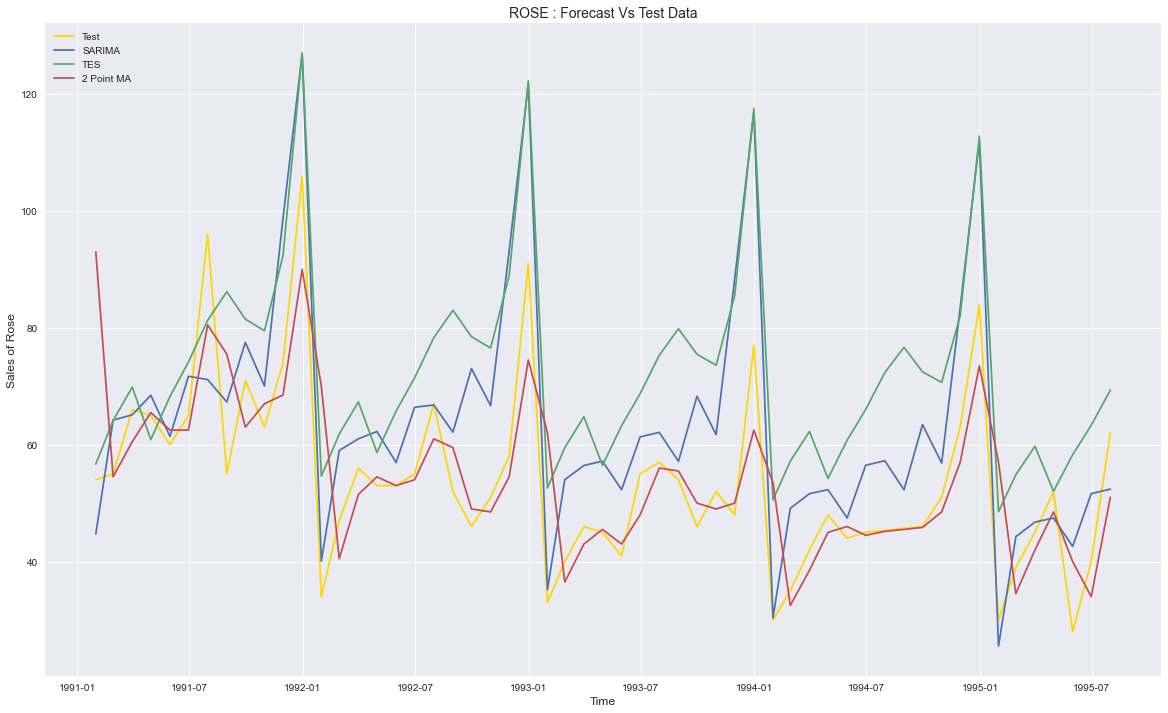

In [154]:
plt.figure(figsize=(20,12))

plt.plot(TES_test['Rose'], label='Test', color = 'gold')

#SARIMA
plt.plot(SARIMA_test['rose_manual_forecasted'],  label='SARIMA')

#TES
plt.plot(TES_test['predict_rose',alpha_7_2,beta_7_2,gamma_7_2],  label='TES')

#MA
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'],  label='2 Point MA')

plt.legend(loc='upper left')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : Forecast Vs Test Data', fontsize=14)

In [155]:
model_TES_rose = ExponentialSmoothing(df['Rose'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_rose_fit = model_TES_rose.fit(smoothing_level=0.1,smoothing_slope=0.2,smoothing_seasonal=0.1,optimized=True,use_brute=True)
TES_rose_forecast = model_TES_rose_fit.forecast(steps=12)

In [156]:
rmse_rose_tes_full = metrics.mean_squared_error(df['Rose'],model_TES_rose_fit.fittedvalues,squared=False)
mape_rose_tes_full = MAPE(df['Rose'],model_TES_rose_fit.fittedvalues)
print("TES forecast on the Rose Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_tes_full, mape_rose_tes_full))

TES forecast on the Rose Full Data:  RMSE is 17.024 and MAPE is 13.65


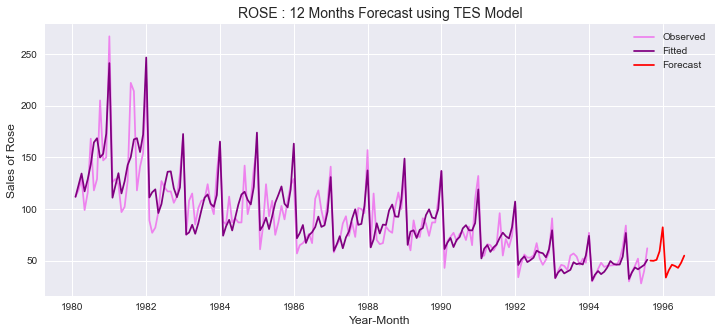

In [157]:
plt.figure(figsize=(12,5))

plt.plot(df['Rose'], label='Observed', color = 'violet')
plt.plot(model_TES_rose_fit.fittedvalues, label='Fitted', color = 'purple')
plt.plot(TES_rose_forecast, label='Forecast', color = 'Red')

plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using TES Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'ROSE : 12 Months Forecast')

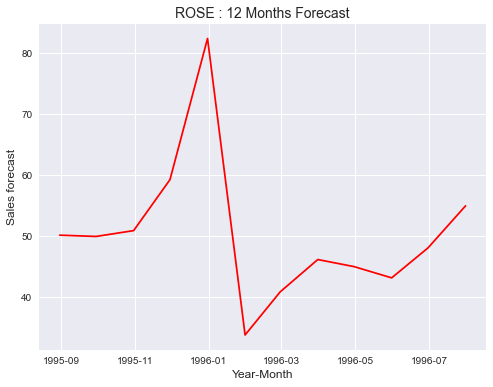

In [158]:
plt.figure(figsize=(8,6))
plt.plot(TES_rose_forecast, label='Forecast', color = 'Red')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('ROSE : 12 Months Forecast', fontsize=14)

### Attempt SARIMA(4,1,1)x(0,1,1,12) for forecast

In [159]:
from warnings import filterwarnings
filterwarnings('ignore')

In [160]:
rose_full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order= (4,1,1), 
                                seasonal_order= (0,1,1,12), 
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_rose = rose_full_data_model.fit(maxiter=1000)
print(results_full_data_model_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -664.135
Date:                            Sun, 10 Oct 2021   AIC                           1342.270
Time:                                    19:00:13   BIC                           1363.796
Sample:                                01-31-1980   HQIC                          1351.011
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0914      0.084      1.093      0.274      -0.072       0.255
ar.L2         -0.1077      0.077   

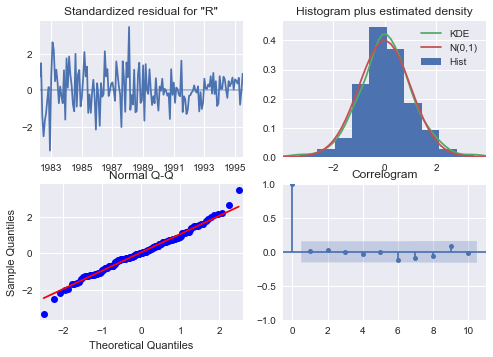

In [161]:
results_full_data_model_rose.plot_diagnostics();

In [162]:
predicted_rose_SARIMA_full_data = results_full_data_model_rose.get_forecast(steps=12)
predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,46.540808,15.245485,16.660206,76.421411
1995-09-30,45.514602,15.769107,14.607720,76.421484
1995-10-31,46.226234,15.827871,15.204177,77.248291
1995-11-30,54.319829,15.831175,23.291296,85.348362
1995-12-31,82.214864,15.835193,51.178456,113.251272


In [163]:
rmse_rose_sarima_full = metrics.mean_squared_error(df['Rose'],results_full_data_model_rose.fittedvalues,squared=False)
mape_rose_sarima_full = MAPE(df['Rose'],results_full_data_model_rose.fittedvalues)

print("For SARIMA forecast on the Rose Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_sarima_full, mape_rose_sarima_full))

For SARIMA forecast on the Rose Full Data:  RMSE is 30.676 and MAPE is 19.40


#### Lets try predicting for 12 months into the future with appropriate confidence intervals/bands:

In [164]:
df.tail()

,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [165]:
pred_full_manual_SARIMA_date = predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

In [166]:
pred_full_manual_SARIMA_date

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,46.540808,15.245485,16.660206,76.421411
1995-09-30,45.514602,15.769107,14.607720,76.421484
1995-10-31,46.226234,15.827871,15.204177,77.248291
1995-11-30,54.319829,15.831175,23.291296,85.348362
1995-12-31,82.214864,15.835193,51.178456,113.251272
1996-01-31,24.809284,15.964022,-6.479625,56.098192
1996-02-29,33.354716,16.173581,1.655079,65.054353
1996-03-31,39.872459,16.377223,7.773691,71.971227
1996-04-30,43.229137,16.536342,10.818503,75.639772
1996-05-31,31.529665,16.658153,-1.119715,64.179044


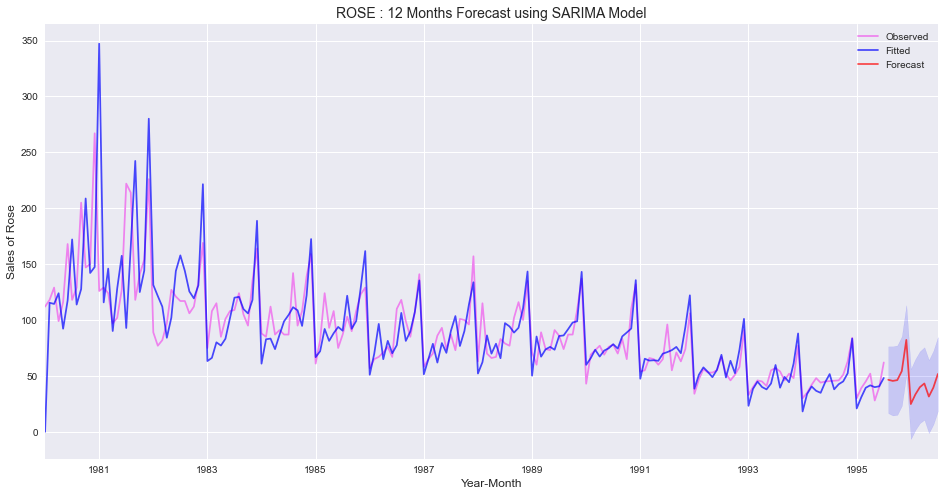

In [167]:
# plot the forecast along with the confidence band
plt.figure(figsize=(16,8))

axis = df['Rose'].plot(label='Observed', color = 'violet')

results_full_data_model_rose.fittedvalues.plot(label='Fitted', alpha=0.7, color = 'blue')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'Red')

axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'ROSE : 12 Months Forecast')

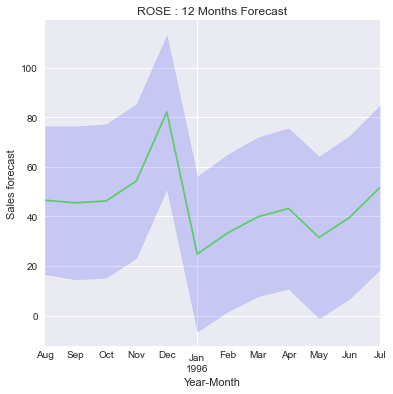

In [168]:
plt.figure(figsize=(6,6))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'limegreen')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('ROSE : 12 Months Forecast', fontsize=12)

In [169]:
forecast2 = pd.DataFrame({'ROSE':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast2

,ROSE
1995-08-31,46.54
1995-09-30,45.51
1995-10-31,46.23
1995-11-30,54.32
1995-12-31,82.21
1996-01-31,24.81
1996-02-29,33.35
1996-03-31,39.87
1996-04-30,43.23
1996-05-31,31.53


In [170]:
forecast2.describe()

,ROSE
count,12.000000
mean,44.905000
std,14.473222
min,24.810000
25%,38.007500
50%,44.370000
75%,47.830000
max,82.210000


### 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

Text(0.5, 1.0, 'ROSE : 12 Months Forecast')

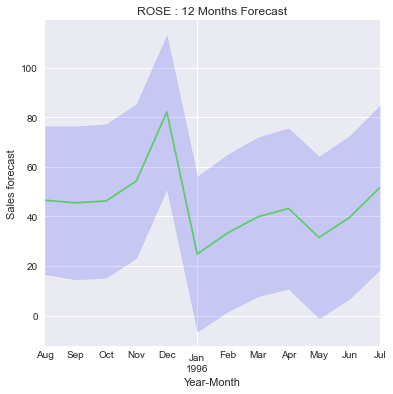

In [171]:
plt.figure(figsize=(6,6))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'limegreen')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('ROSE : 12 Months Forecast', fontsize=12)

In [172]:
forecast2 = pd.DataFrame({'ROSE':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast2

,ROSE
1995-08-31,46.54
1995-09-30,45.51
1995-10-31,46.23
1995-11-30,54.32
1995-12-31,82.21
1996-01-31,24.81
1996-02-29,33.35
1996-03-31,39.87
1996-04-30,43.23
1996-05-31,31.53


- The model forecasts sale of 539 units of Rose wine in 12 months into future. Which is an average sale of 45 units per month.


- The seasonal sale in December 1995 will reach a maximum of 82 units, before it drops to the lowest sale in January 1996; at 25 units.


- Unlike Sparkling wine, Rose wine sells very low number of units and the standard deviation is only 14.5. Which means that higher demand does not impact procurement and production.


- Apart from higher sale in November and December months, Rose sales will be above average in the summer months of July and August


- The winery should investigate the low demand for Rose wine in market and make corrective actions in marketing and promotions.
